# Statistical methods in AI

## Assignment 2

### Problem 3:
### Hierarchial Clustering

This assignment will implement hierarchial Clustering from scratch using numpy libraries. Like always, let us start by having a look at how our dataset looks like

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
customers = pd.read_csv('new_customers.csv')
customers = customers.drop('CustomerID', axis = 1) # removing the index column
customers['Genre'].replace(['Male', 'Female'], [0, 1], inplace =    True) # Converting the categorical data into 0 and 1

print(customers.head())

   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      0   19                  15                      39
1      0   21                  15                      81
2      1   20                  16                       6
3      1   23                  16                      77
4      1   31                  17                      40


Let us try to visulaize the data through scatter plots. We will perform PCA to reduce the above dimensionality to 2. We will implement the Hierarchial clustering class and perform it on the original. 

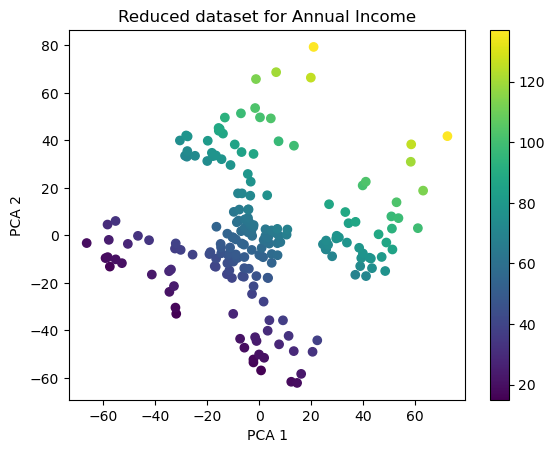

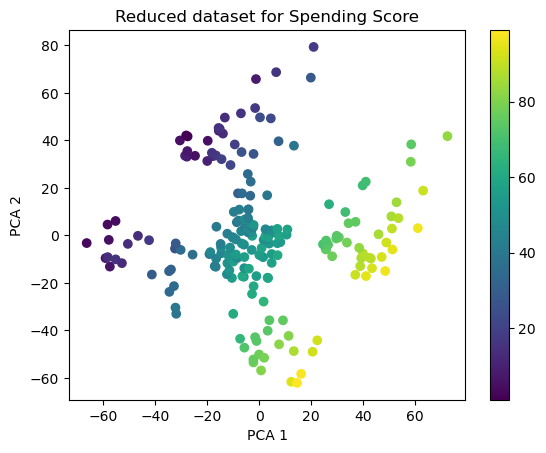

In [3]:
pca = PCA(2)
customers_pca = pca.fit_transform(customers)

plt.scatter(customers_pca[:, 0], customers_pca[:, 1], c = customers['Annual Income (k$)'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Reduced dataset for Annual Income')
plt.colorbar()
plt.show()

plt.scatter(customers_pca[:, 0], customers_pca[:, 1], c = customers['Spending Score (1-100)'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Reduced dataset for Spending Score')
plt.colorbar()
plt.show()

We can see clear clusters from the both features. Let us also standardize the original dataset to so that we can perform clustering on that as well.

In [4]:
scaler = StandardScaler()
numeric_col = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
customers_standard = scaler.fit_transform(customers[numeric_col])
customers_standard = pd.DataFrame(customers_standard, columns=numeric_col)
customers = pd.concat([customers['Genre'], customers_standard], axis = 1)
print(customers.head())

   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0      0 -1.424569           -1.738999               -0.434801
1      0 -1.281035           -1.738999                1.195704
2      1 -1.352802           -1.700830               -1.715913
3      1 -1.137502           -1.700830                1.040418
4      1 -0.563369           -1.662660               -0.395980


Now let us start with implementing the hierarchial clustering class.

In [20]:
class Hierarchial_cluster:
    
    def linkage(self, data, linkage_type, feature):
        return linkage(data, linkage_type, metric = feature,optimal_ordering=True)

    def dendogram(self, linkage_matrix):
        return dendrogram(linkage_matrix, orientation='right')    

Now that we have the class for making a dendogram from its linkage matrix, let us see the resuts on our given dataset while varying the linkage type as well as the features.

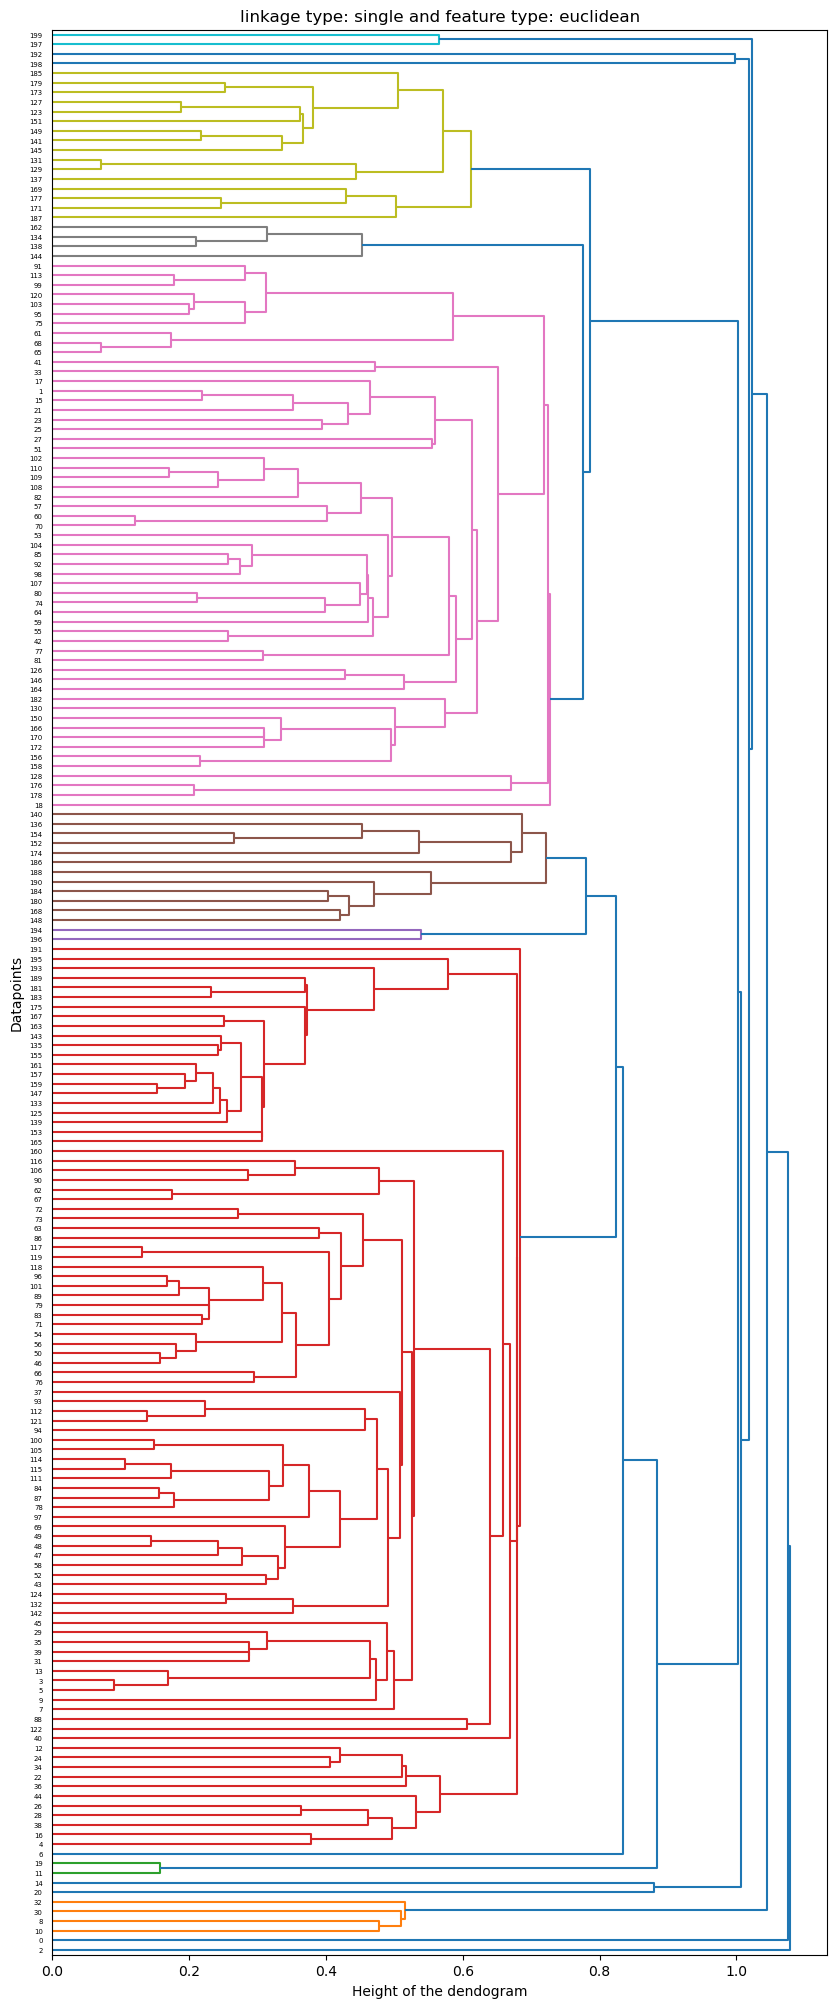

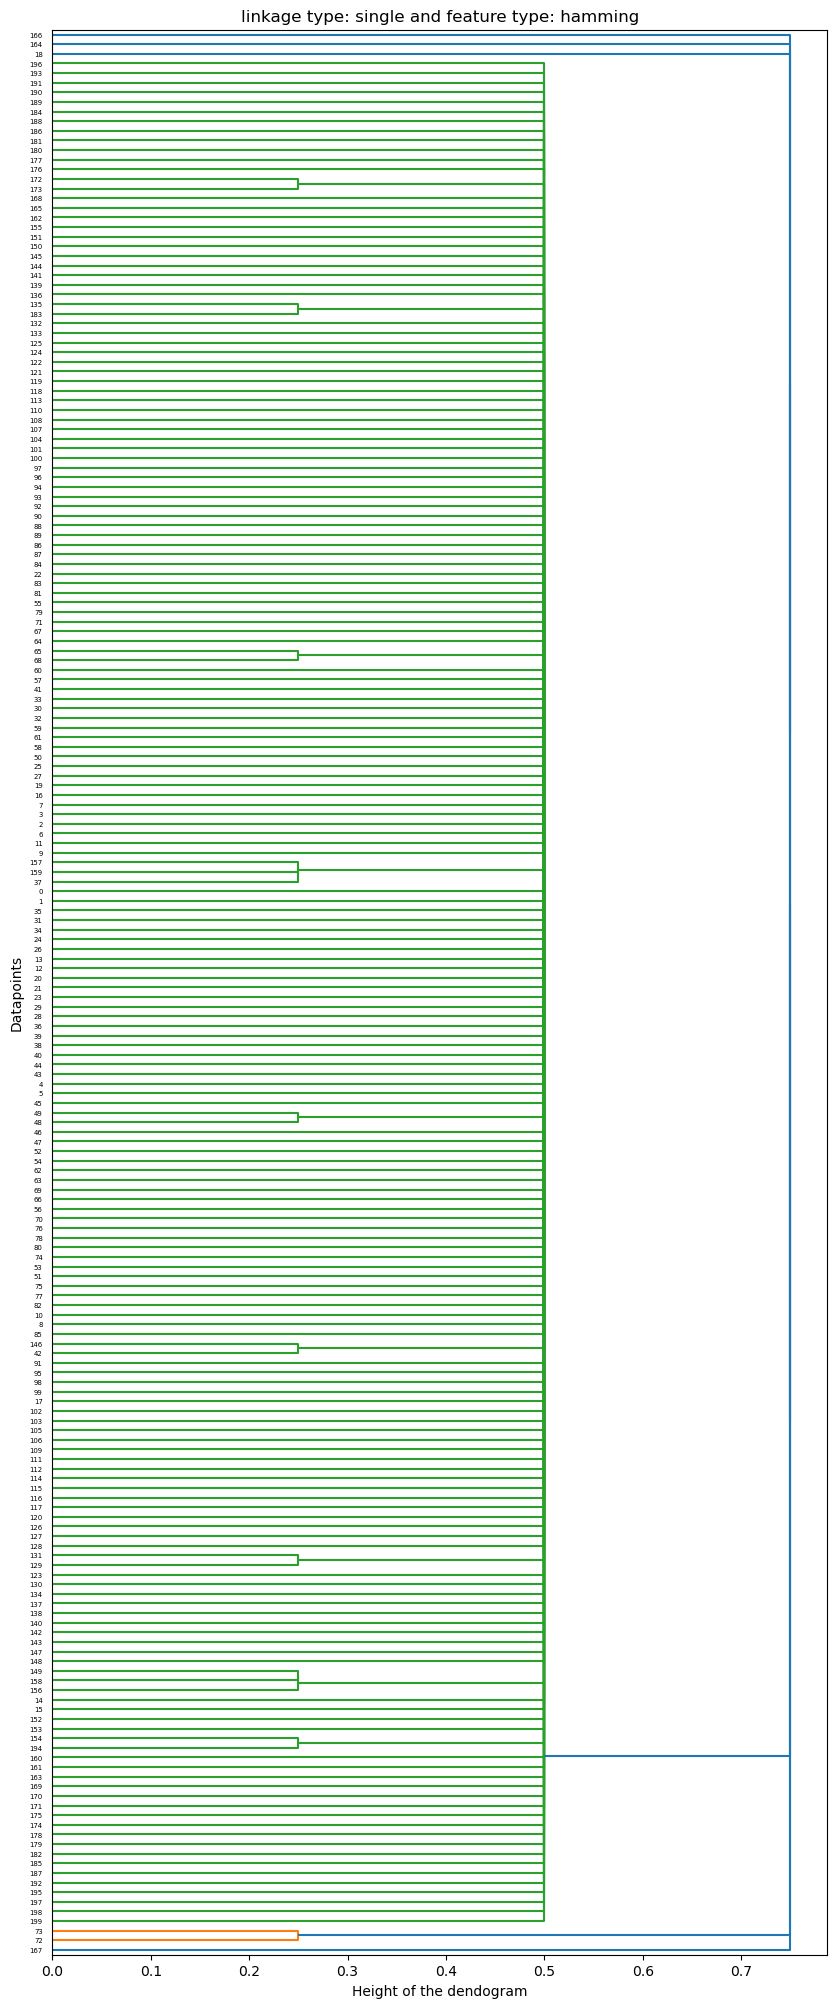

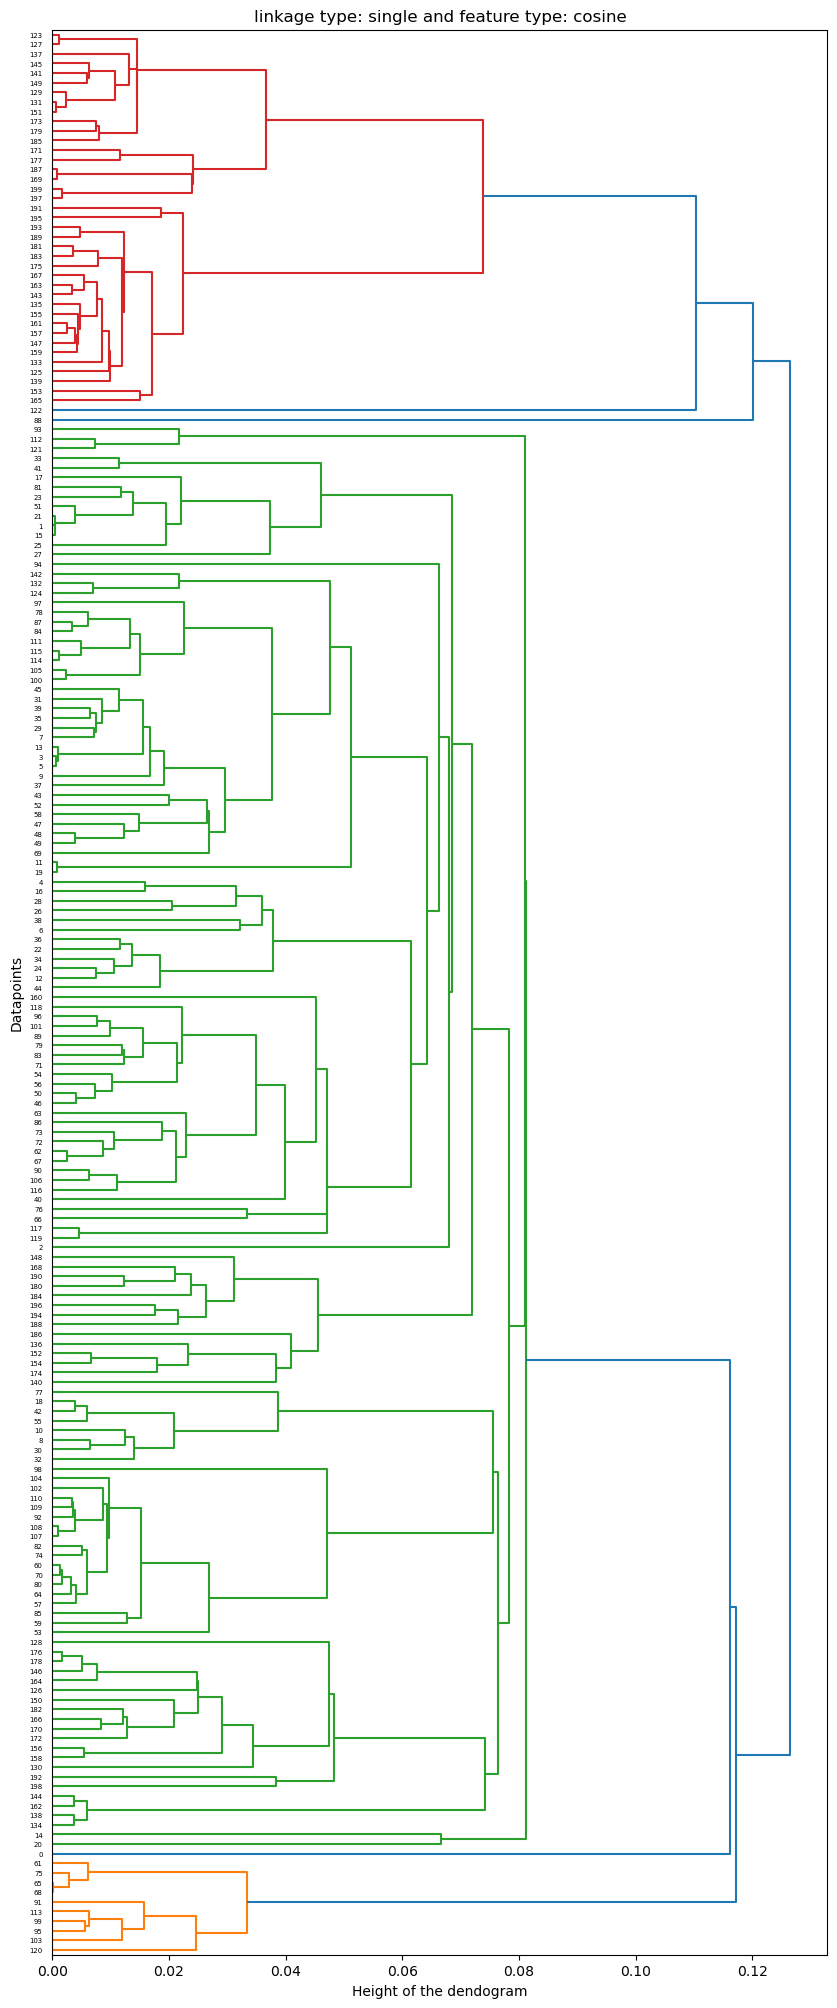

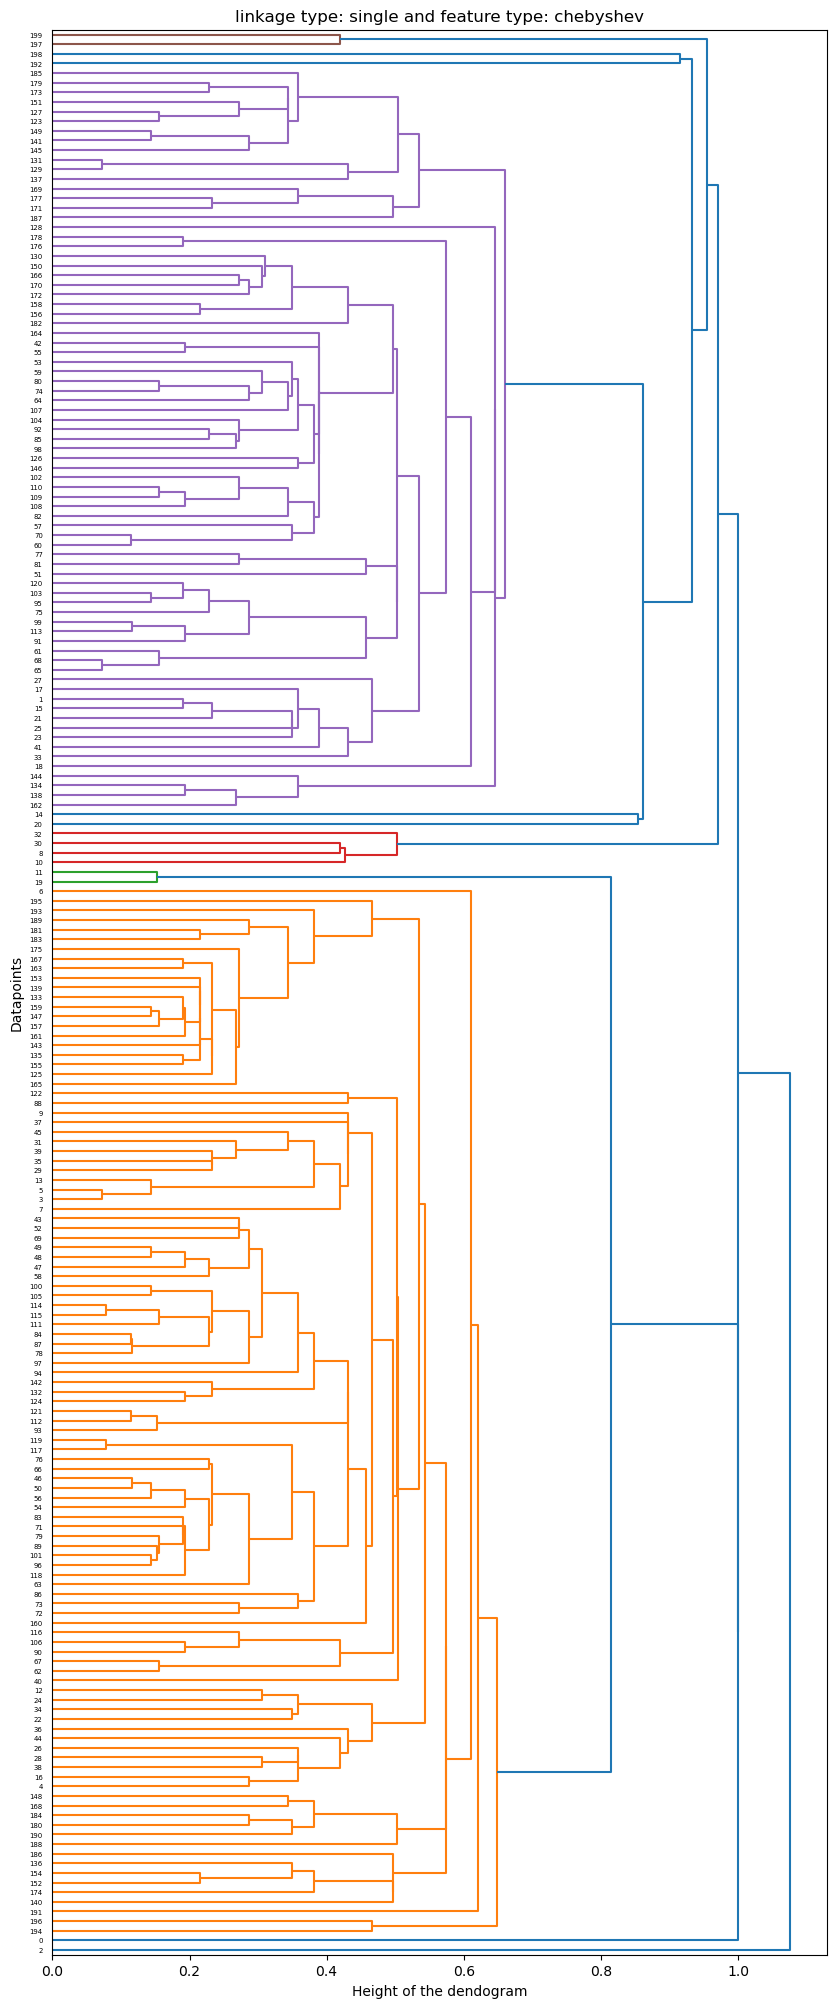

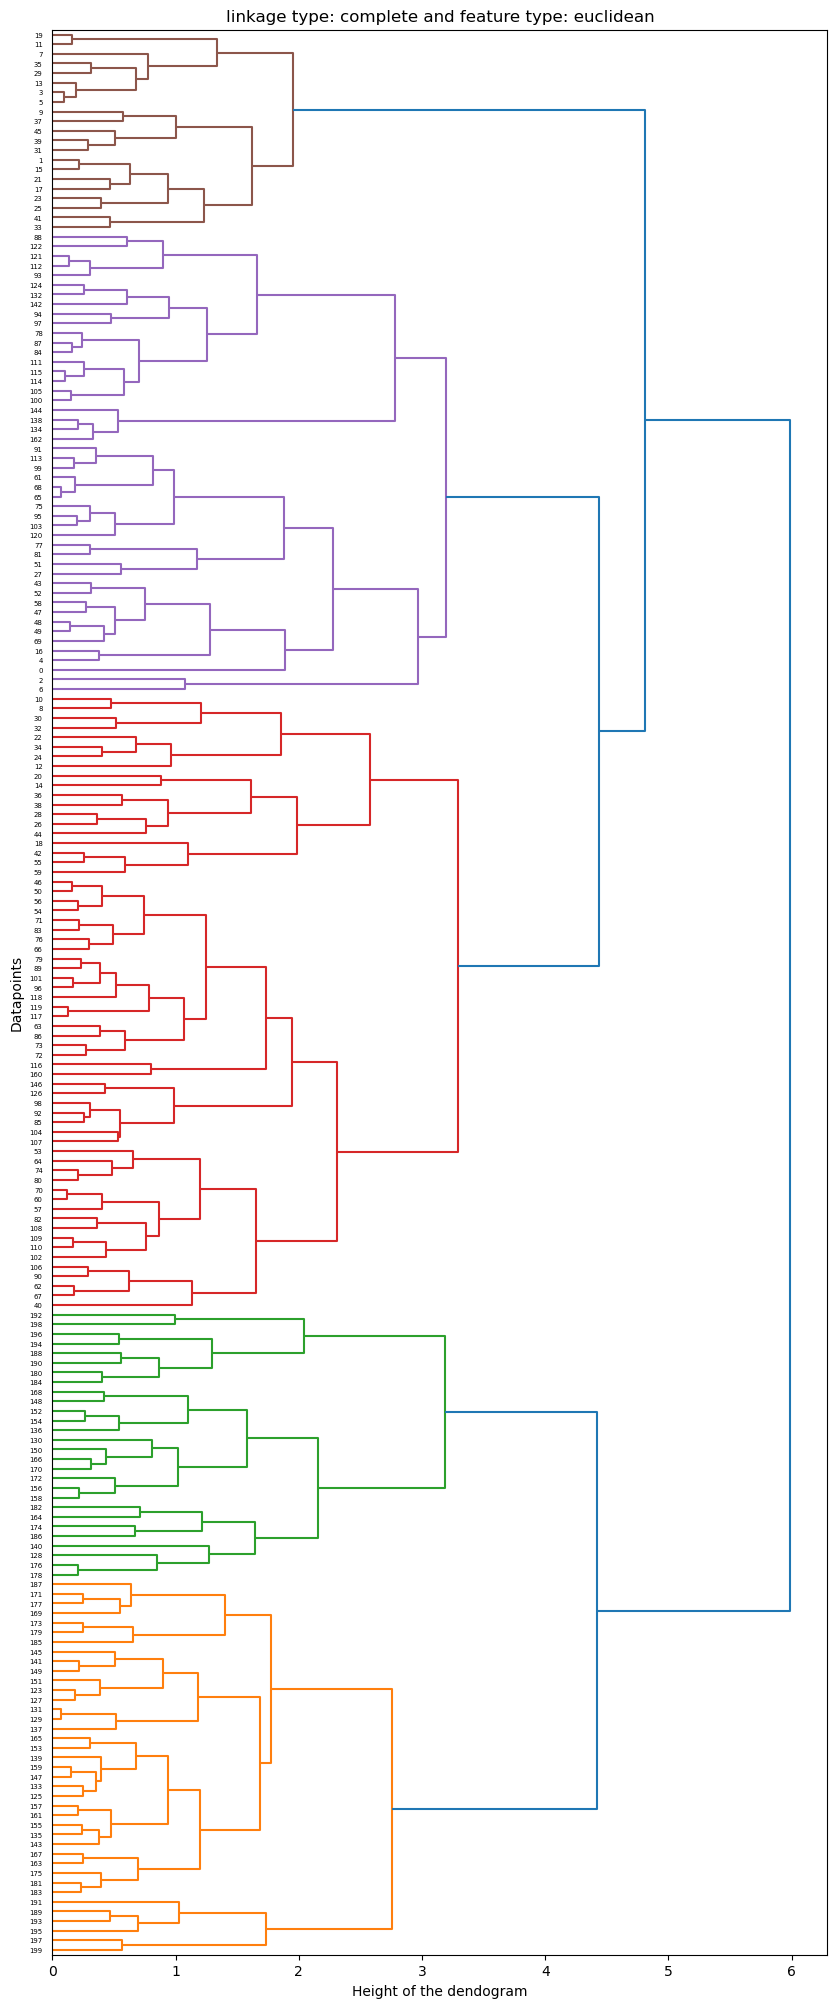

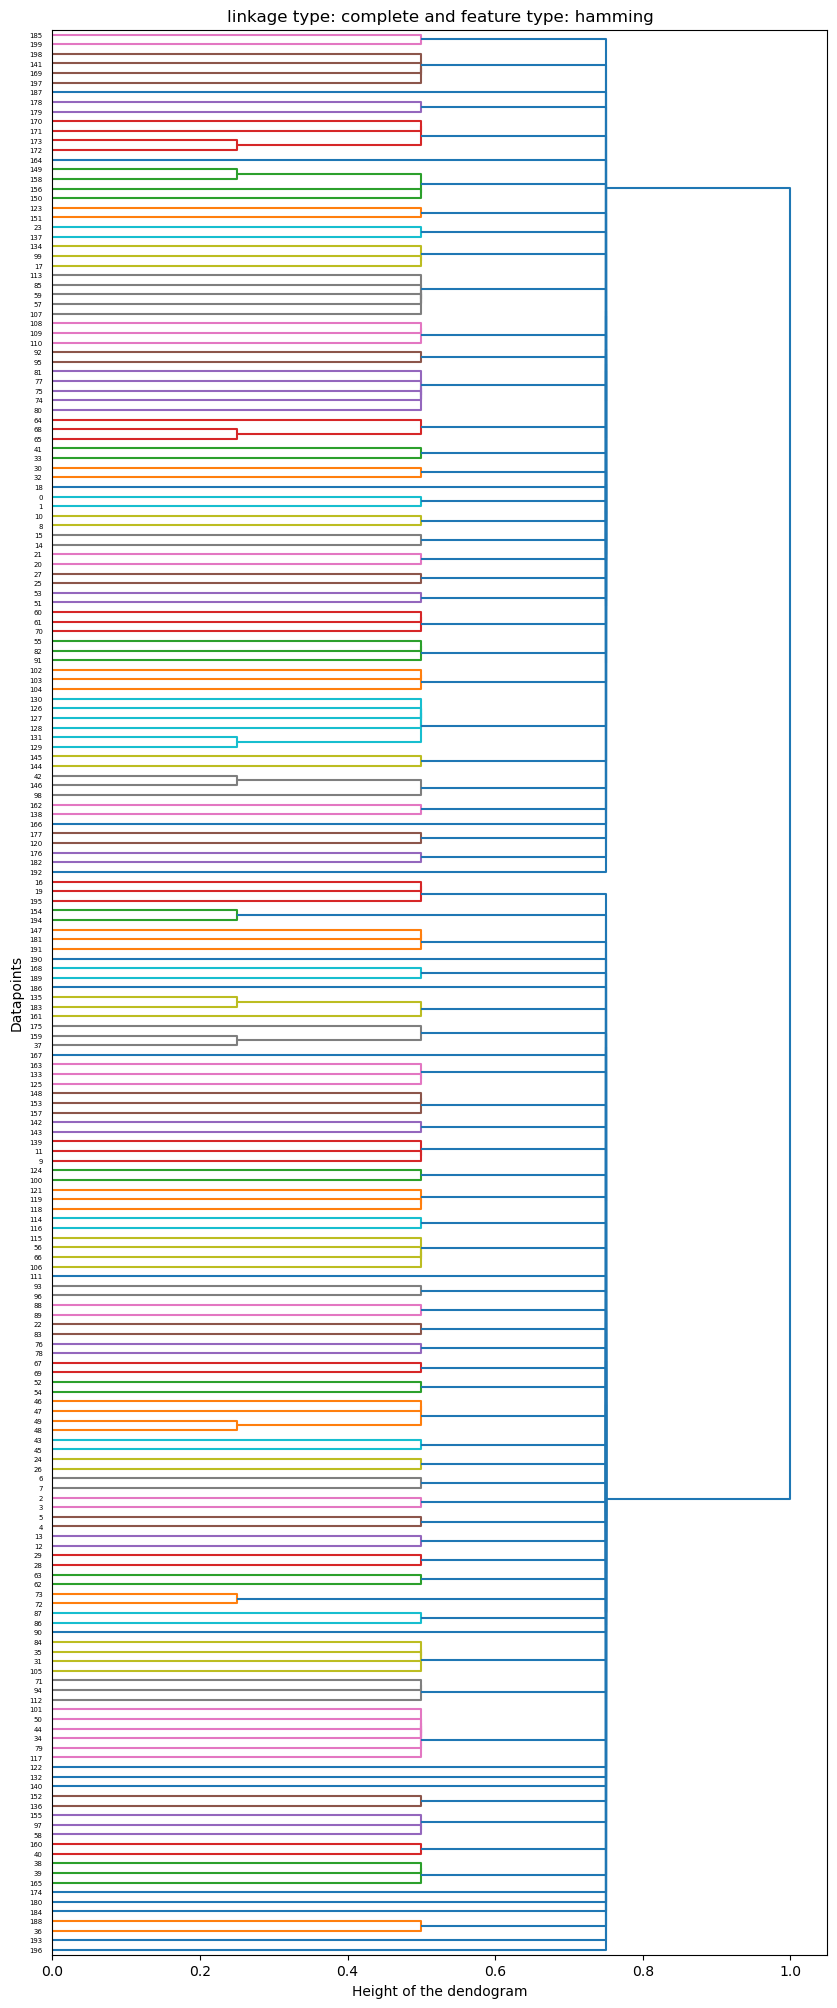

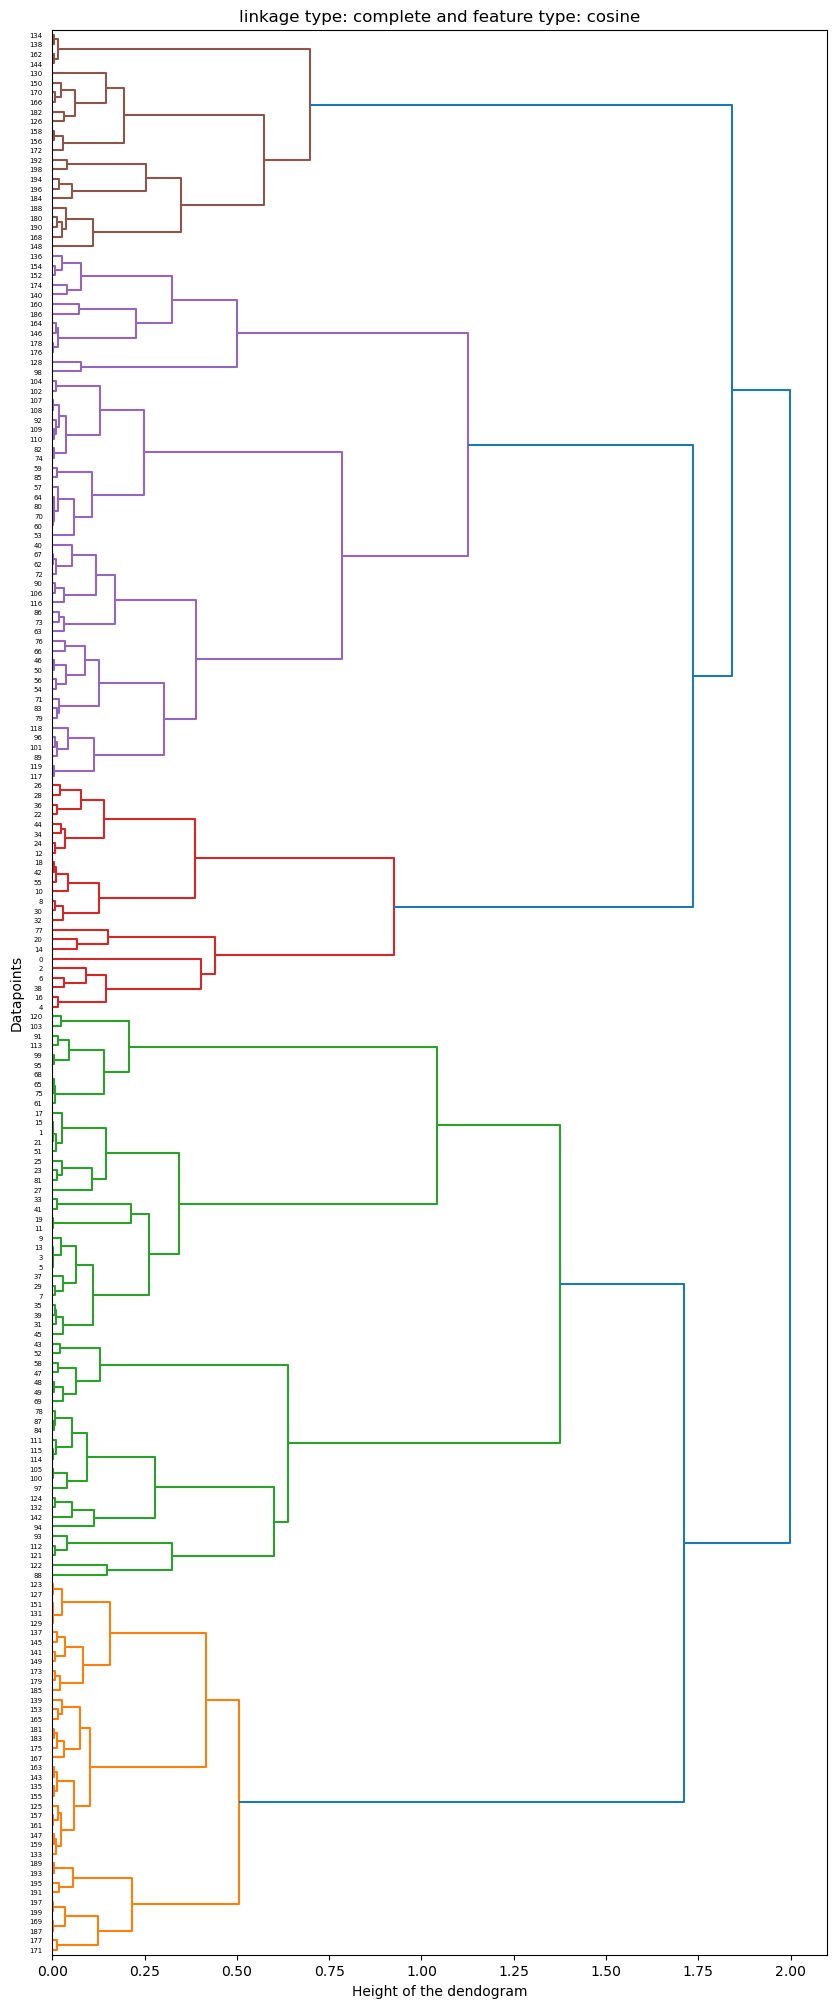

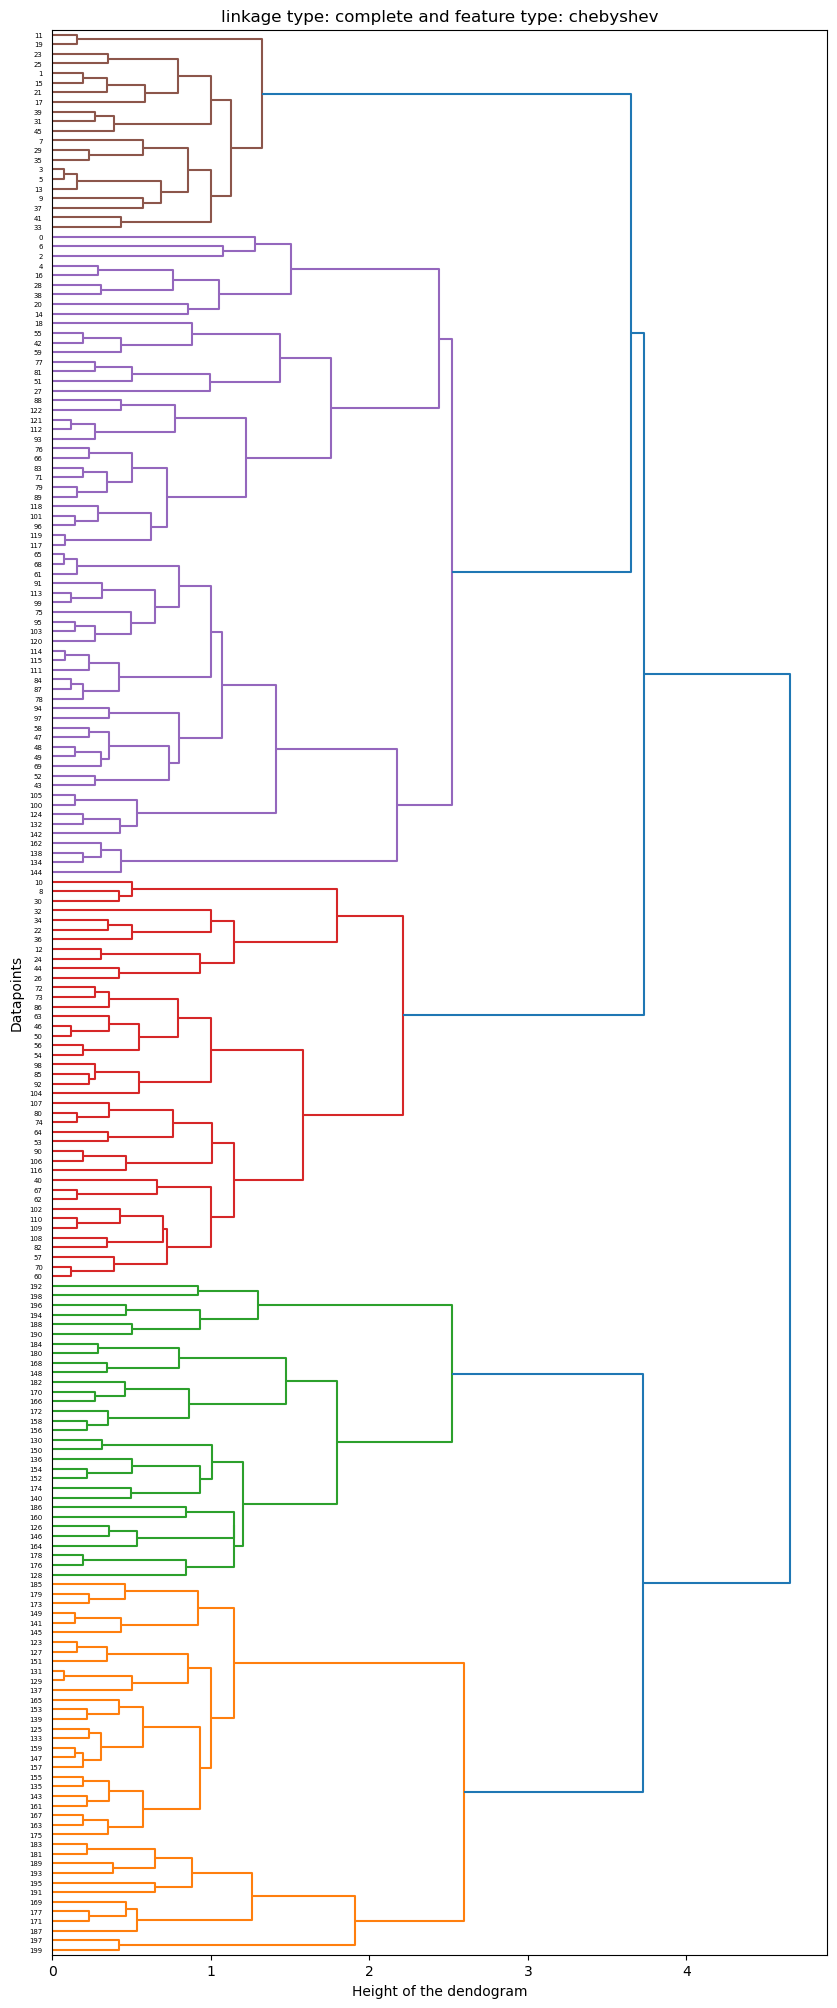

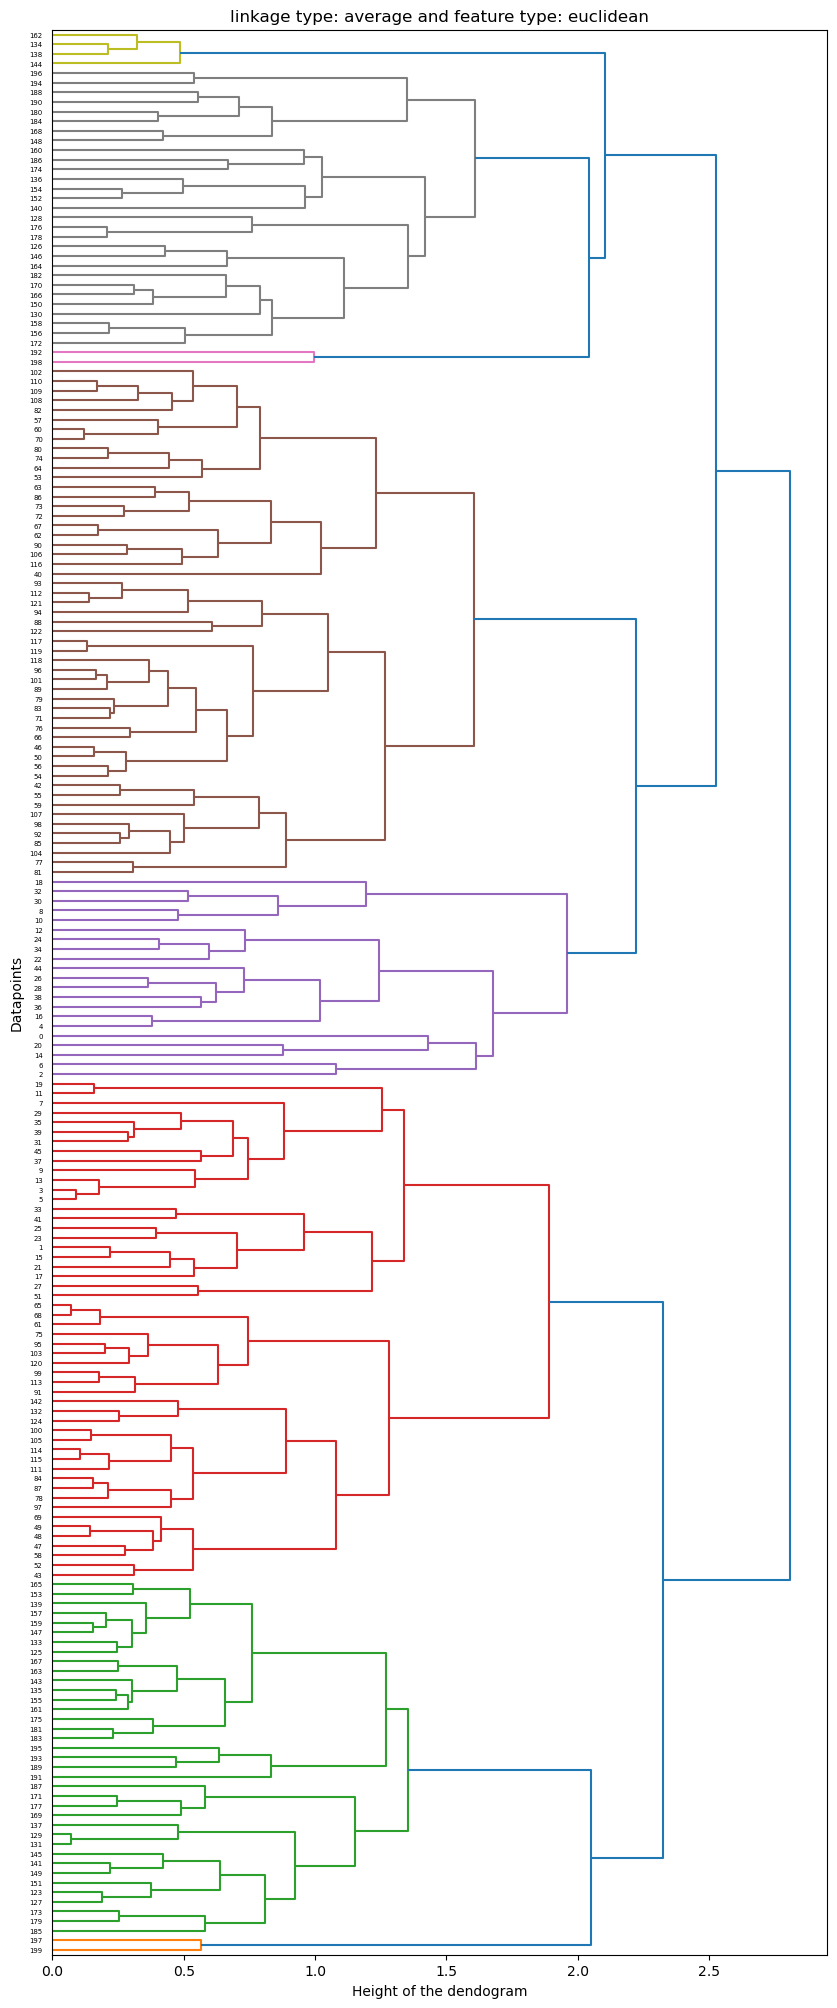

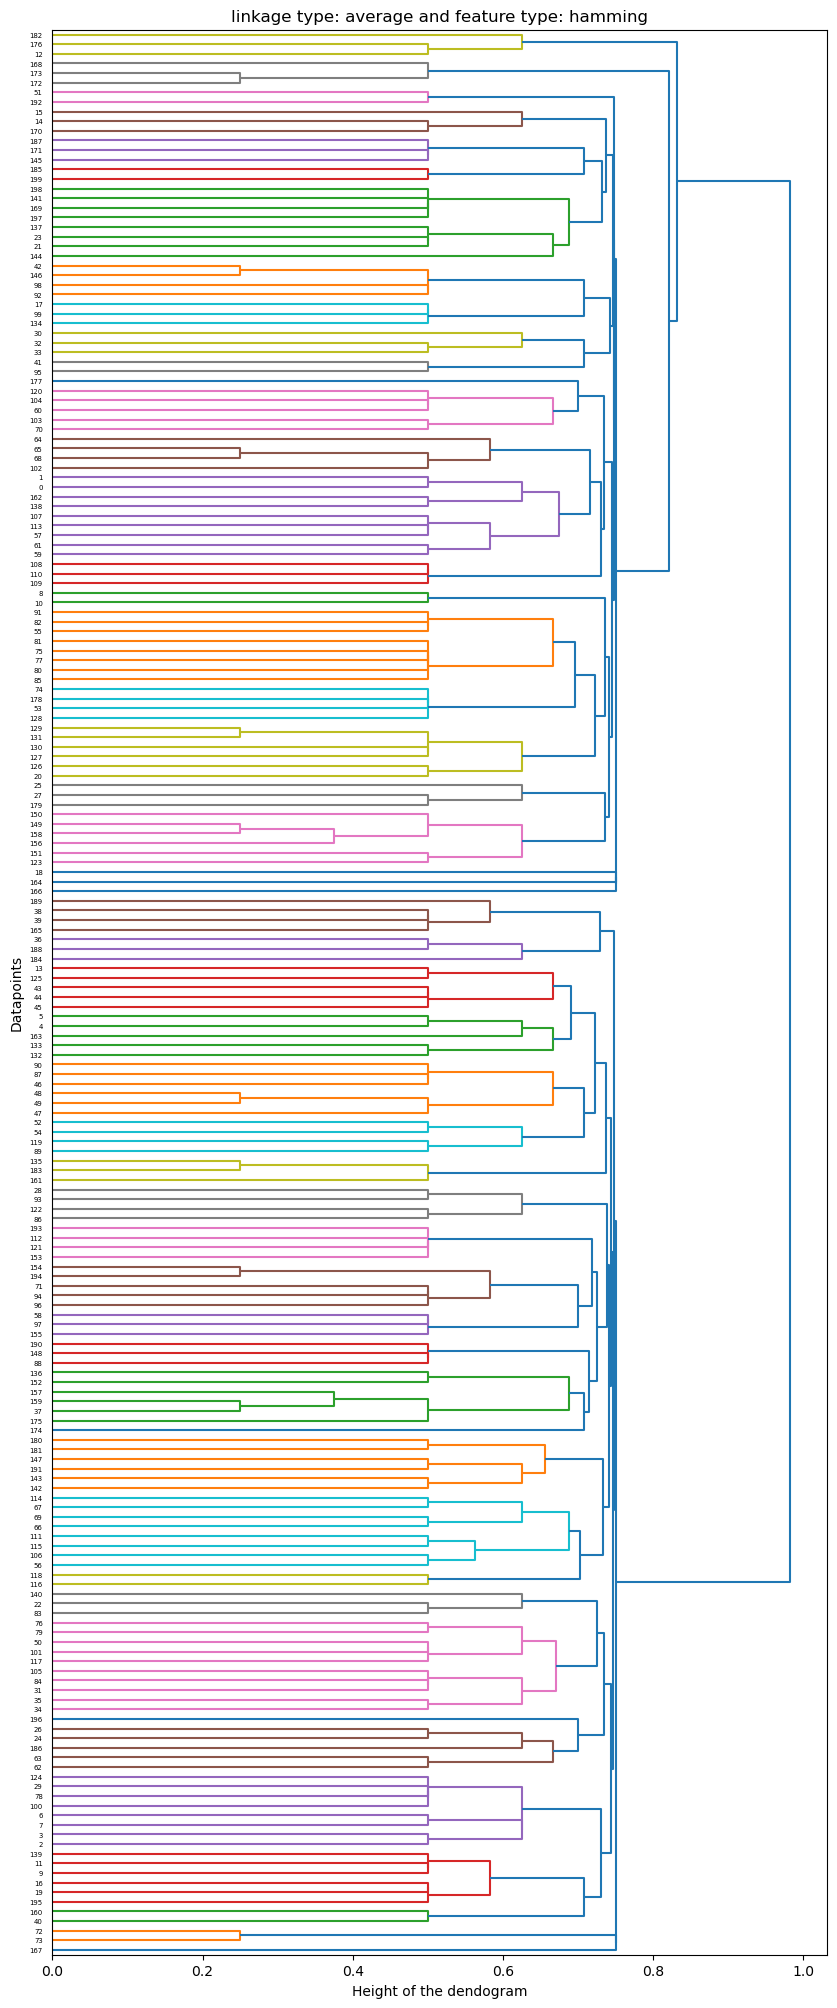

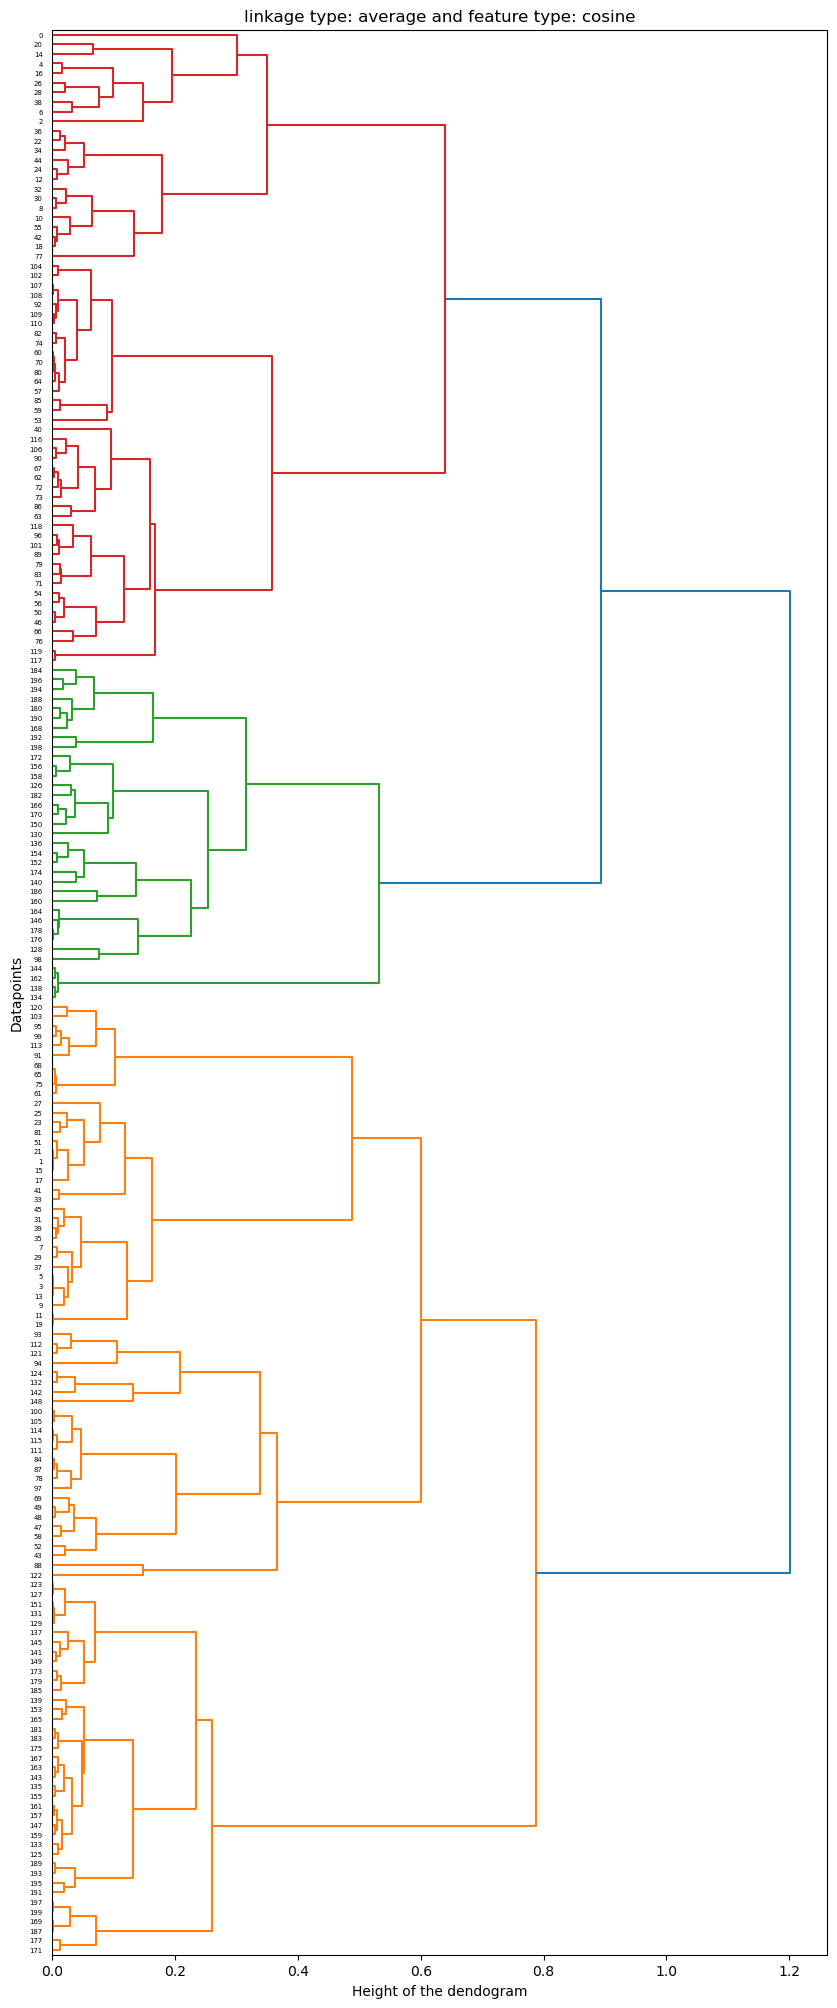

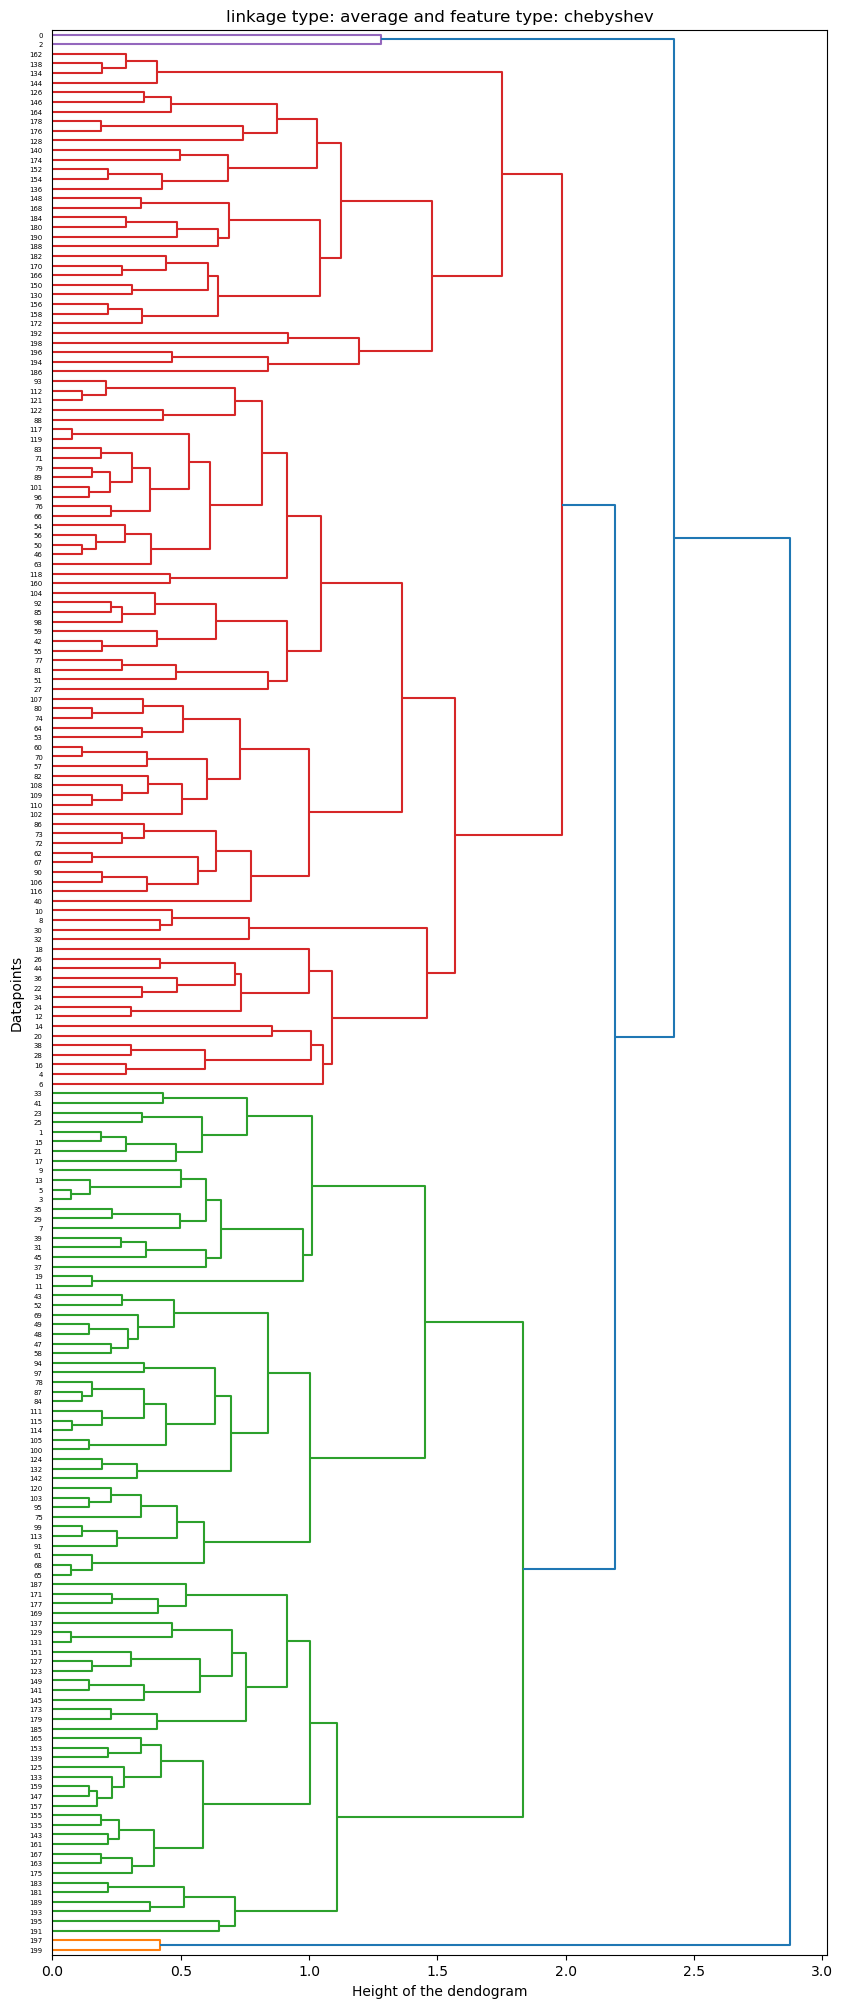

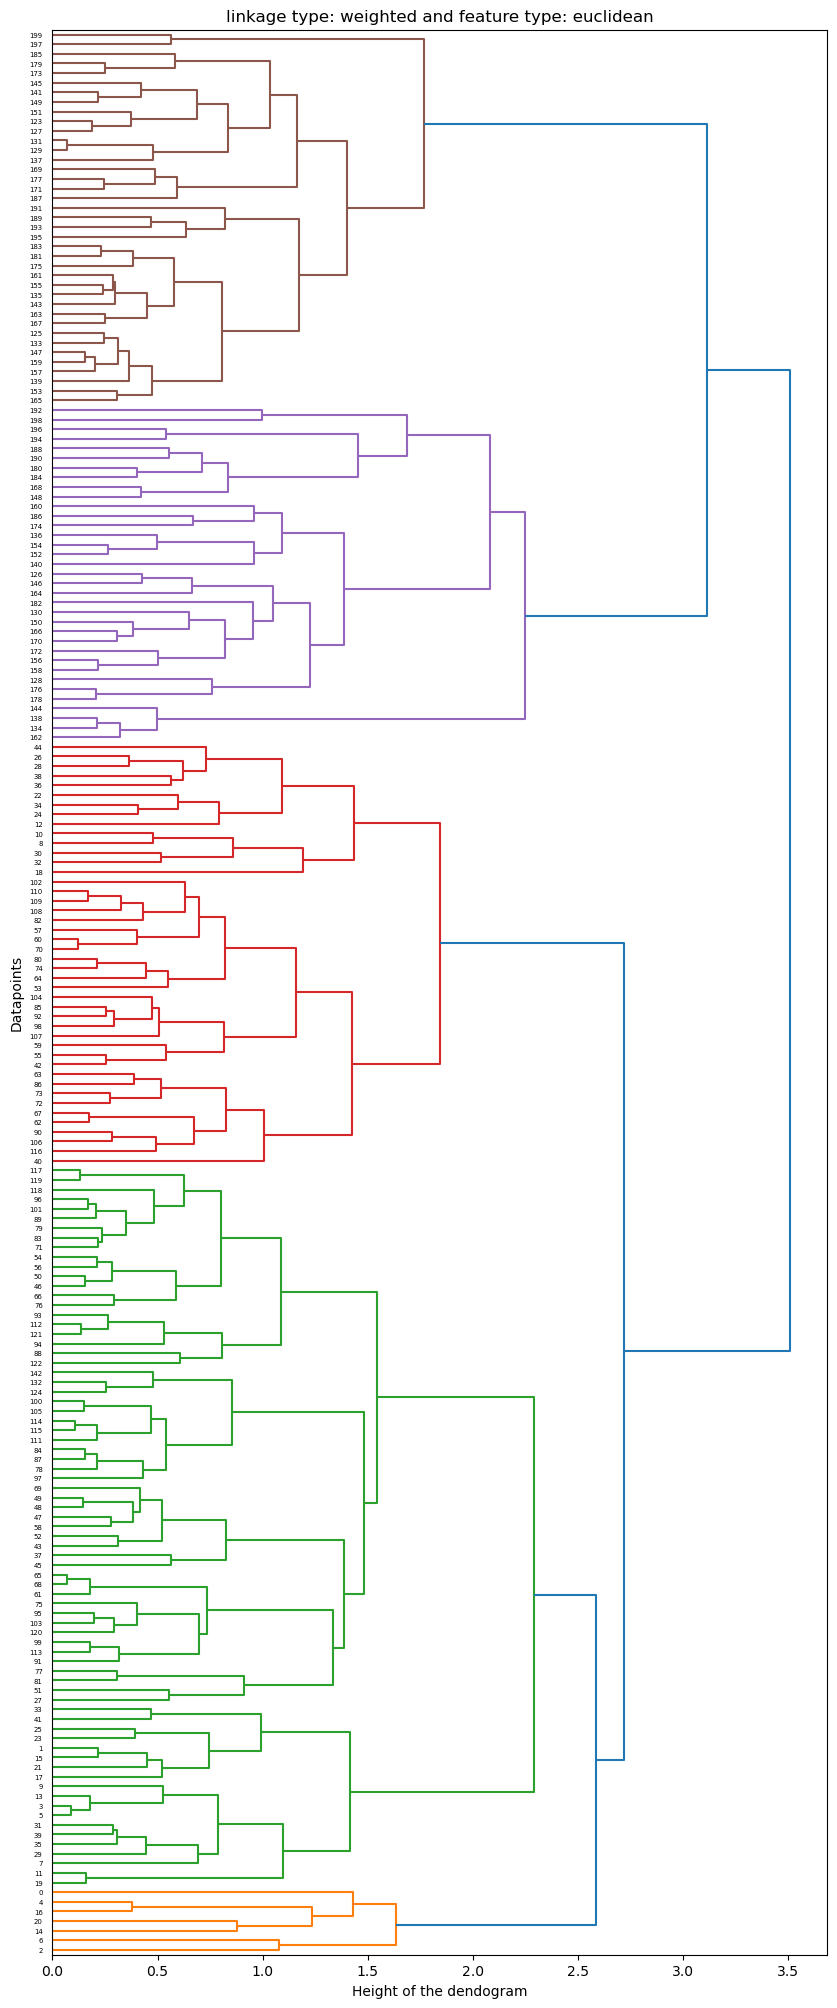

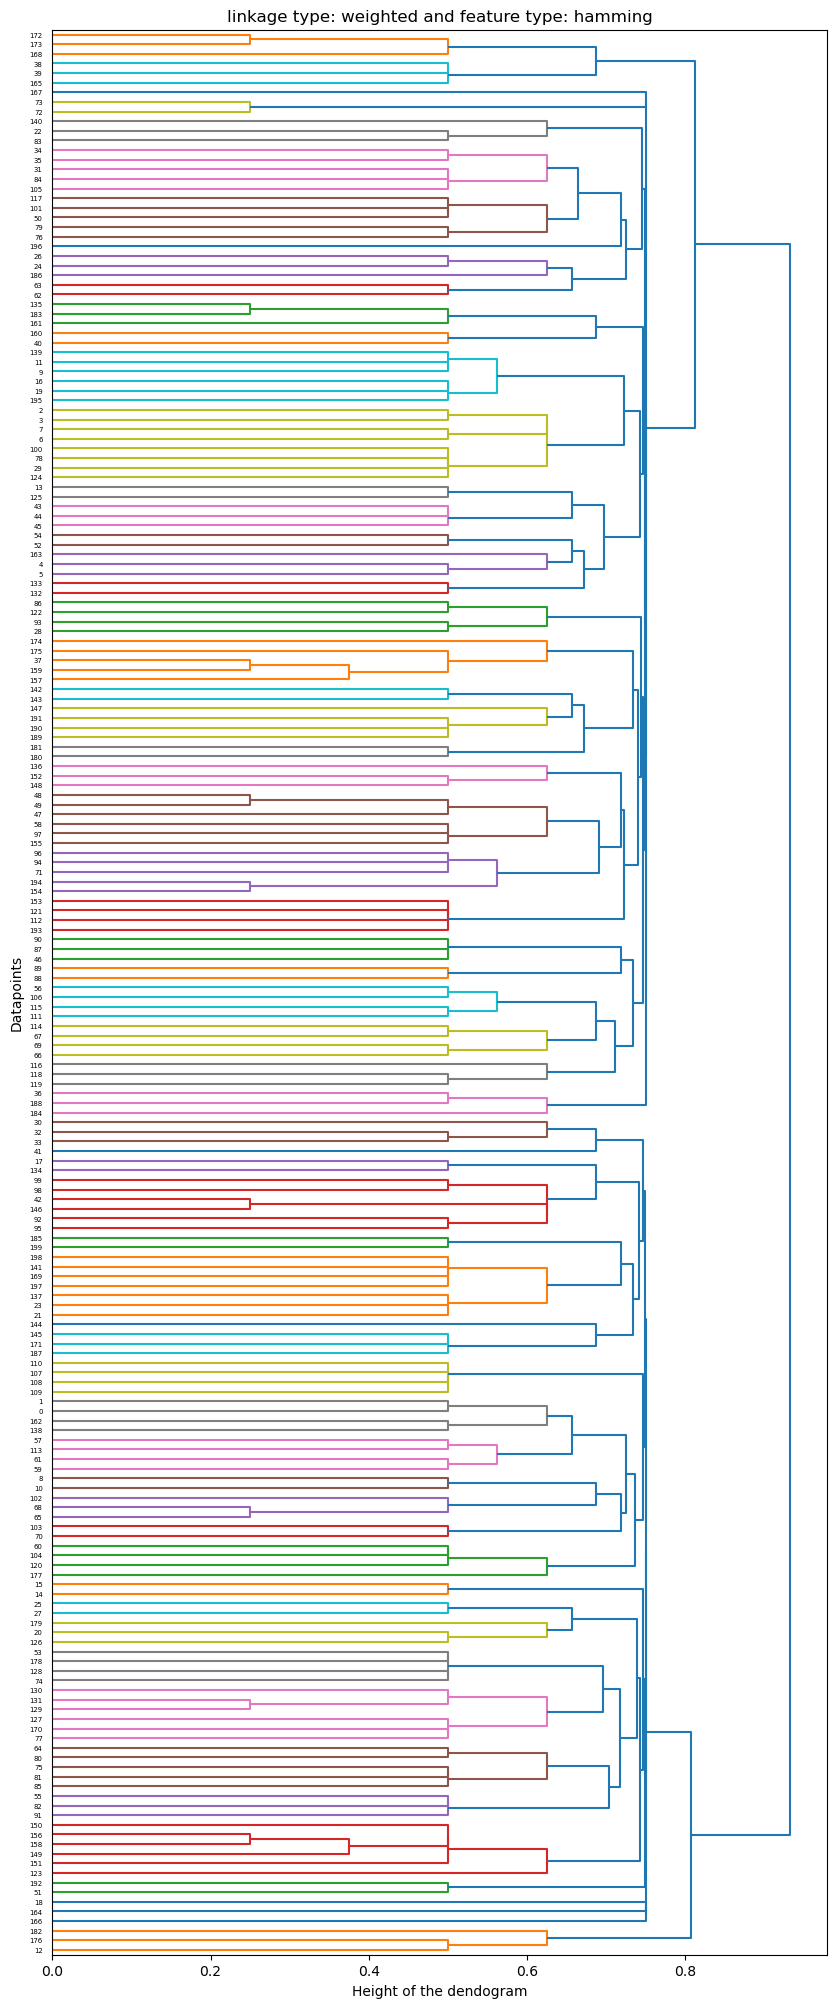

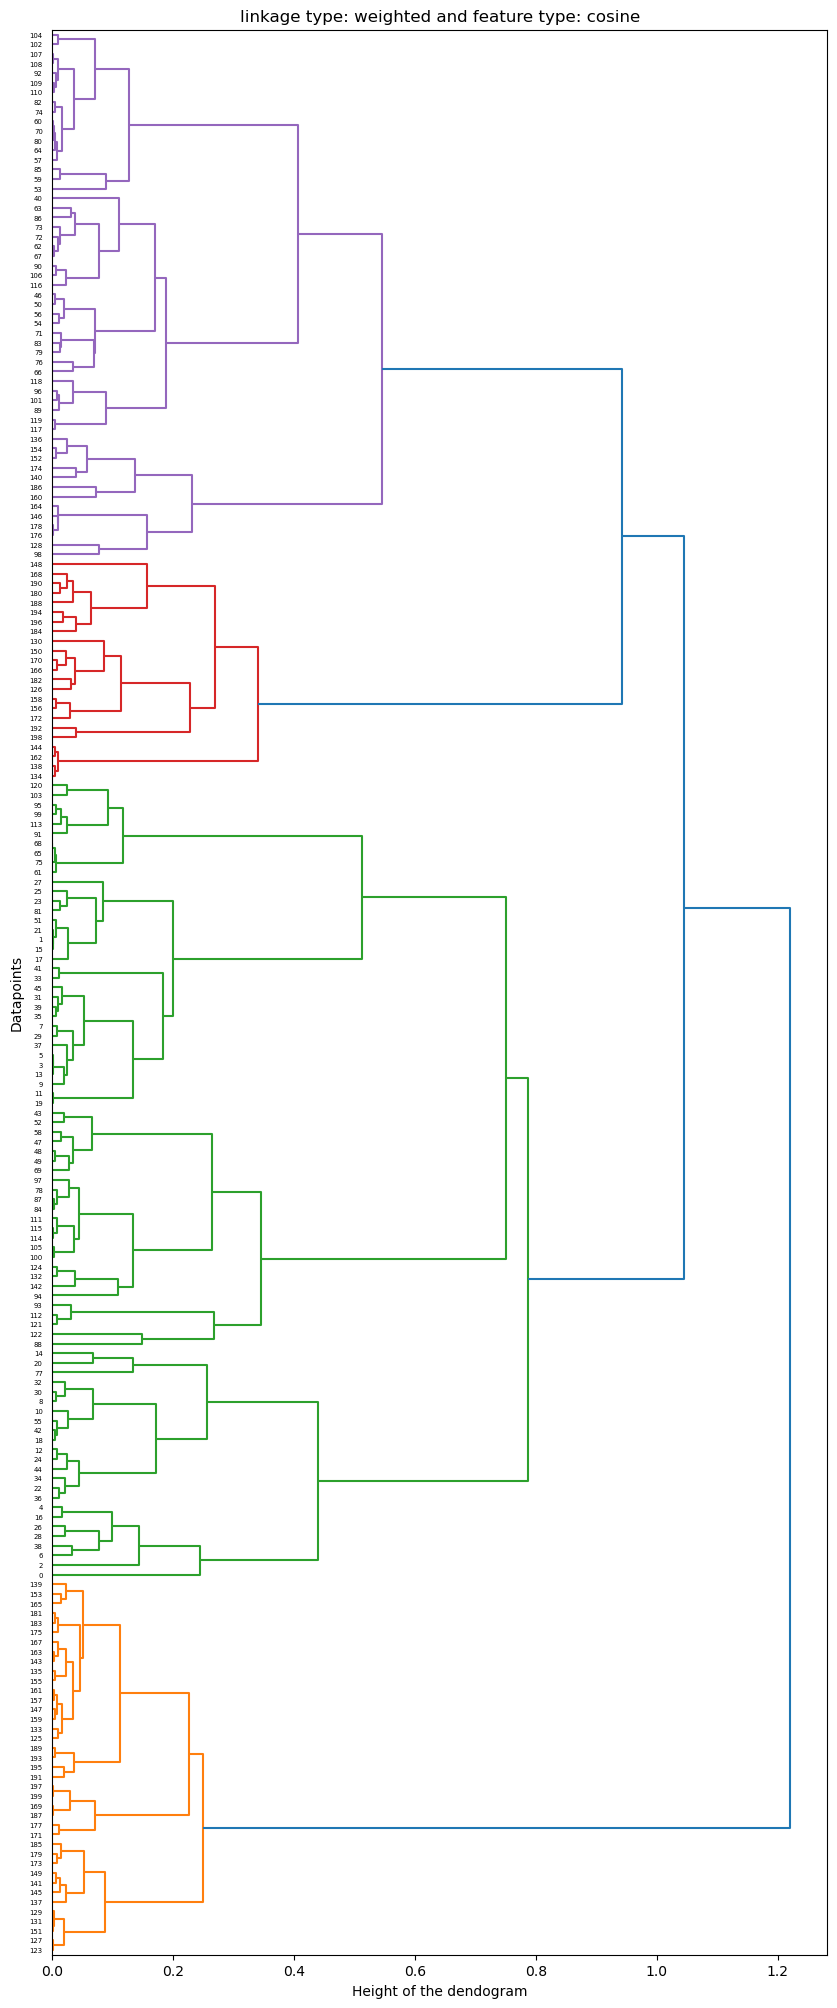

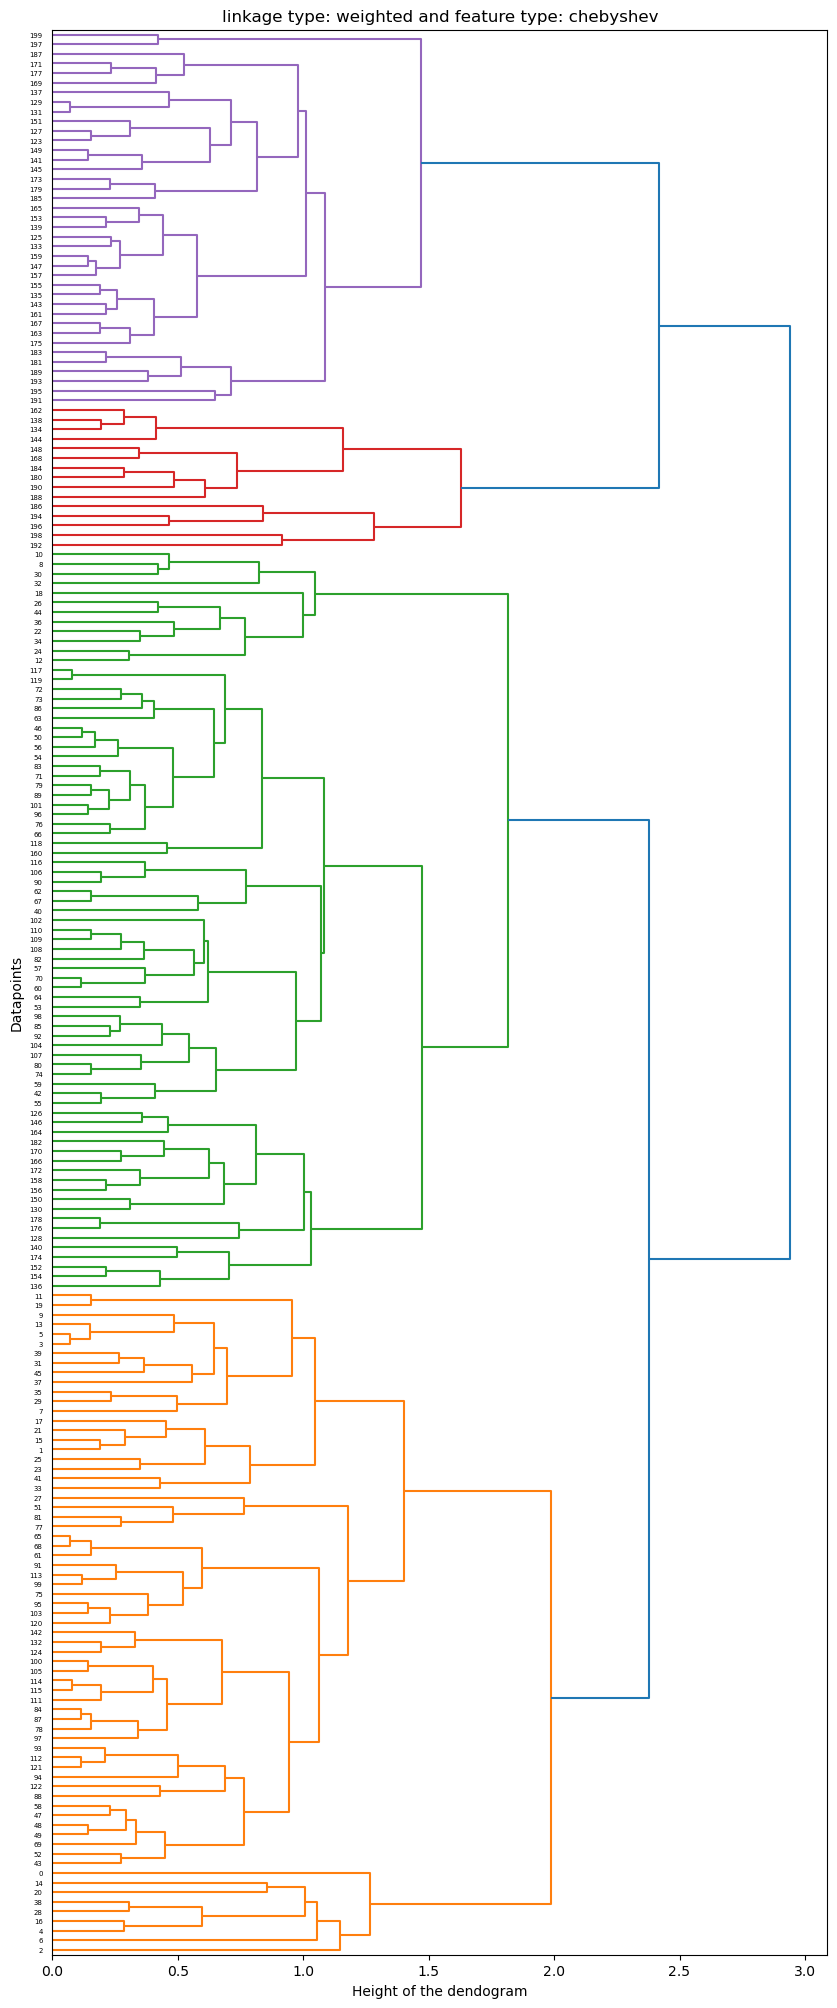

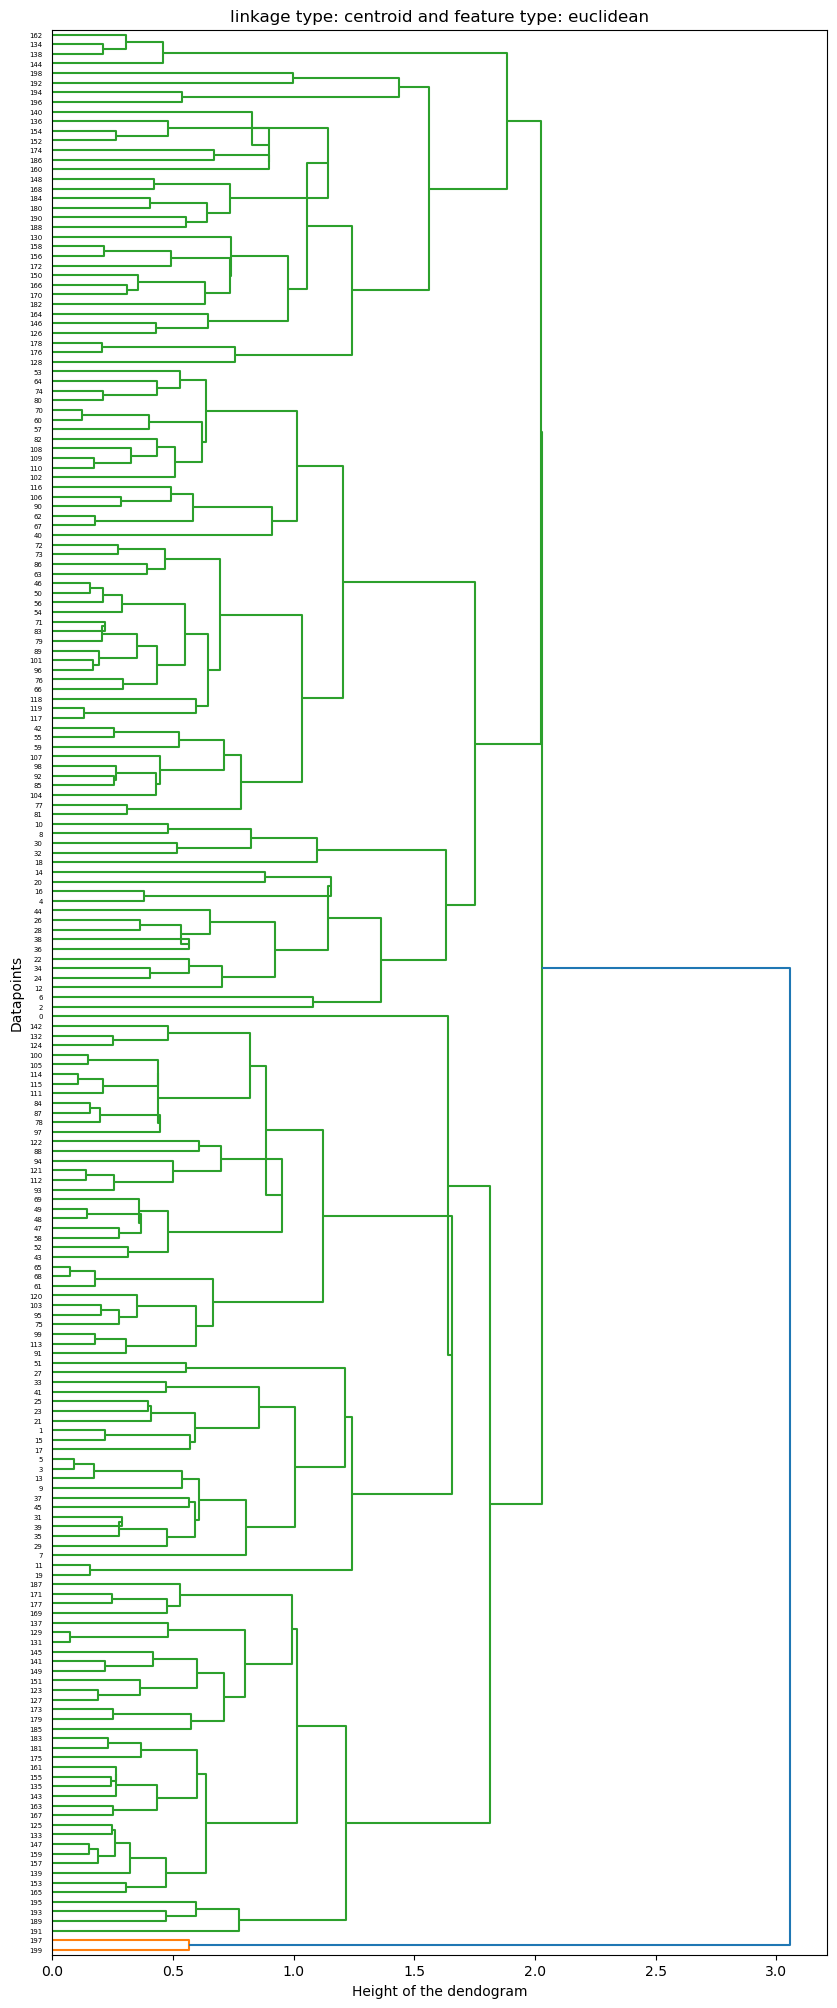

In [21]:
linkage_type = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'] #all possible linkage types given in the linkage documentation of scipy
feature_components = ['euclidean', 'hamming', 'cosine', 'chebyshev']

for link in linkage_type:
    for feature in feature_components:
        if link == 'ward' or link == 'median' or link == 'centroid' and feature != 'euclidean':
            continue
            
        hc = Hierarchial_cluster()

        linkage_matrix = hc.linkage(customers,link, feature)
        plt.figure(figsize=(10, 25))
        dn = hc.dendogram(linkage_matrix)
        plt.xlabel('Height of the dendogram')
        plt.ylabel('Datapoints')
        plt.title(f'linkage type: {link} and feature type: {feature}')

        plt.show()


Following are the observations that are made:
  - Cosine does a good job at clustering as there is more intra cluster distance and less inter cluster distance as shown from the dendogram   
  - Hamming distance, groups less number of data points together.
  - Complete linkage type makes many number of clusters

Now let us perform heirarchial clustering on the second dataset given to us which is the gene dataset. Let us have a look at what the dataset looks like.

In [22]:
gene = pd.read_csv('gene.csv')
gene = gene.drop('ID_REF', axis = 1)
print(gene.head())

    GSM613412  GSM613413   GSM613414   GSM613415   GSM613416   GSM613417  \
0  5192.23000  5974.6500  5393.02000  5158.65000  5244.96000  5143.31000   
1   301.50300   307.6770   362.59600   372.77600   299.98000   308.91200   
2  1850.11000  2037.5400  1891.18000  1752.97000  1718.80000  1762.98000   
3   927.98300  1140.8200   936.43300   918.44000   930.31300   926.49600   
4     5.24974     5.0173     5.09585     3.76912     5.54982     5.27357   

    GSM613418   GSM613419   GSM613420   GSM613421   GSM613422   GSM613423  
0  4621.77000  5173.65000  5811.77000  5465.11000  4972.57000  4528.70000  
1   311.88300   331.53300   344.16100   365.17200   357.14600   372.43600  
2  1630.54000  1905.87000  2141.35000  1891.99000  1652.14000  1593.69000  
3   793.72900   936.18400  1041.49000   942.37700   891.35900   826.81100  
4     3.79682     4.66623     5.68881     5.25432     4.66148     3.93062  


In [23]:
gene_standard = scaler.fit_transform(gene)
gene = pd.DataFrame(gene_standard)
print(gene.head())

         0         1         2         3         4         5         6   \
0  1.843255  1.703434  1.832685  1.722838  1.650678  1.713883  2.009236   
1 -0.258459 -0.278277 -0.255437 -0.244613 -0.267834 -0.268009 -0.252603   
2  0.407030  0.326647  0.379076  0.322778  0.282628  0.328095  0.439431   
3  0.010761  0.013069 -0.017238 -0.020293 -0.023282 -0.014827  0.000271   
4 -0.385770 -0.384116 -0.403835 -0.396311 -0.382064 -0.392488 -0.414287   

         7         8         9         10        11  
0  1.955879  1.867049  1.790597  1.573893  1.893308  
1 -0.261023 -0.277246 -0.257816 -0.249974 -0.224471  
2  0.459767  0.427578  0.355437  0.261766  0.397806  
3  0.015809 -0.003767 -0.025979 -0.038870  0.007051  
4 -0.410675 -0.409989 -0.402379 -0.389265 -0.412239  


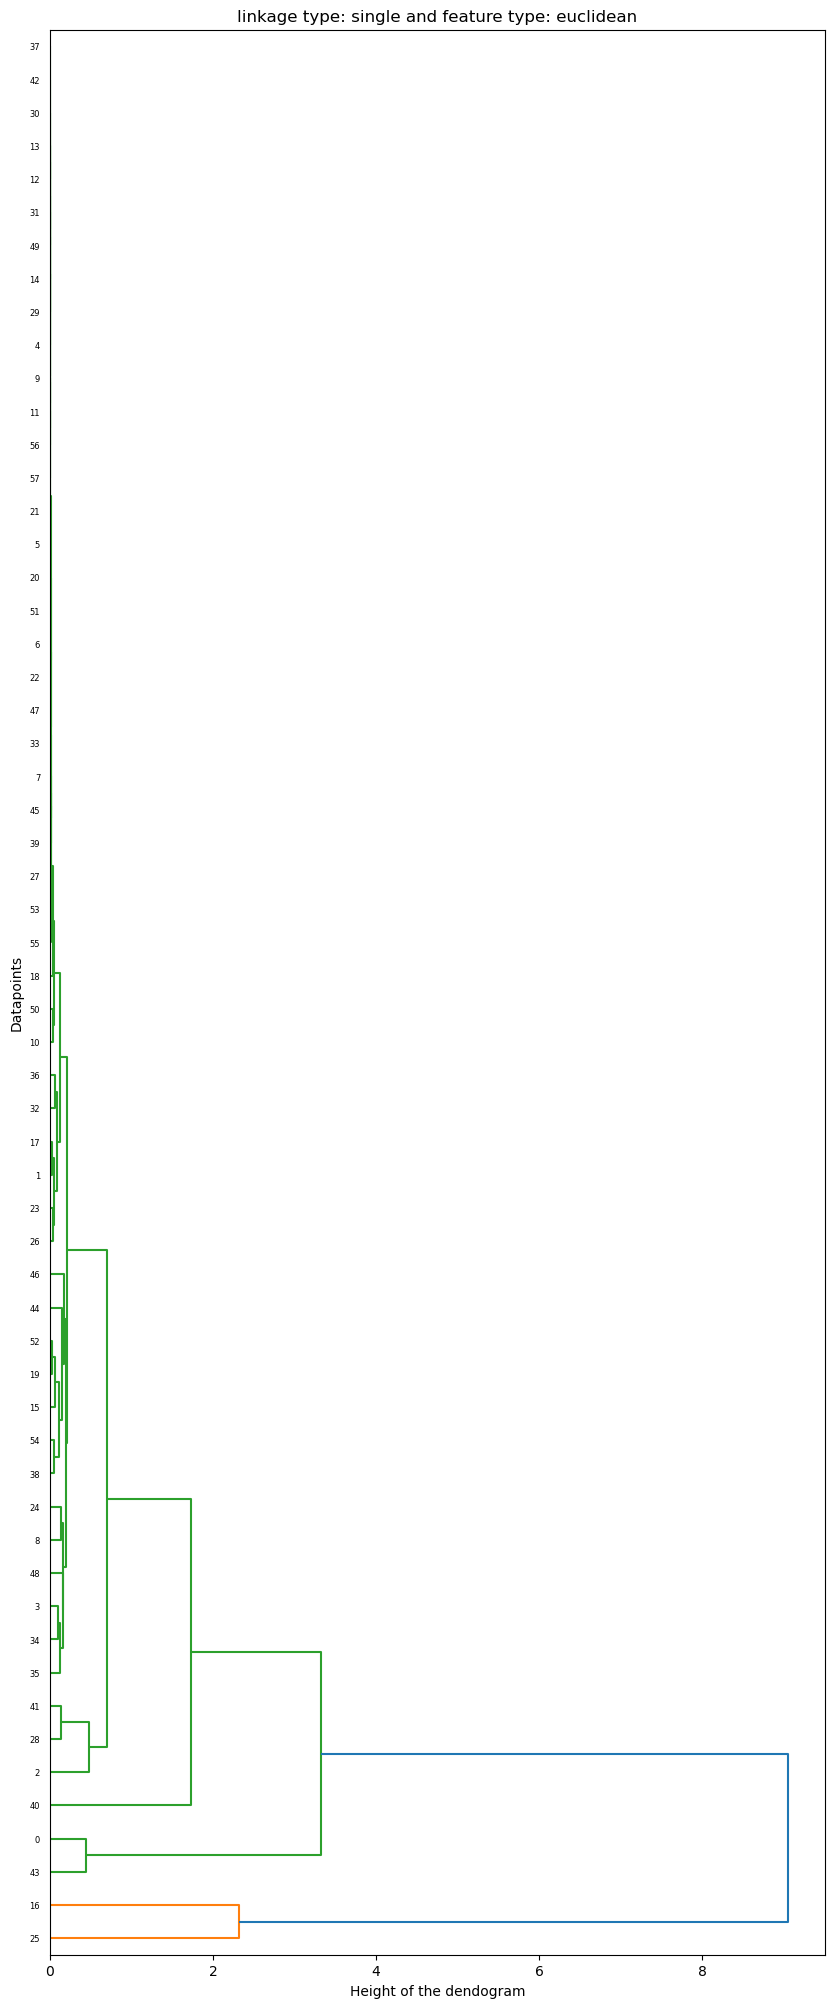

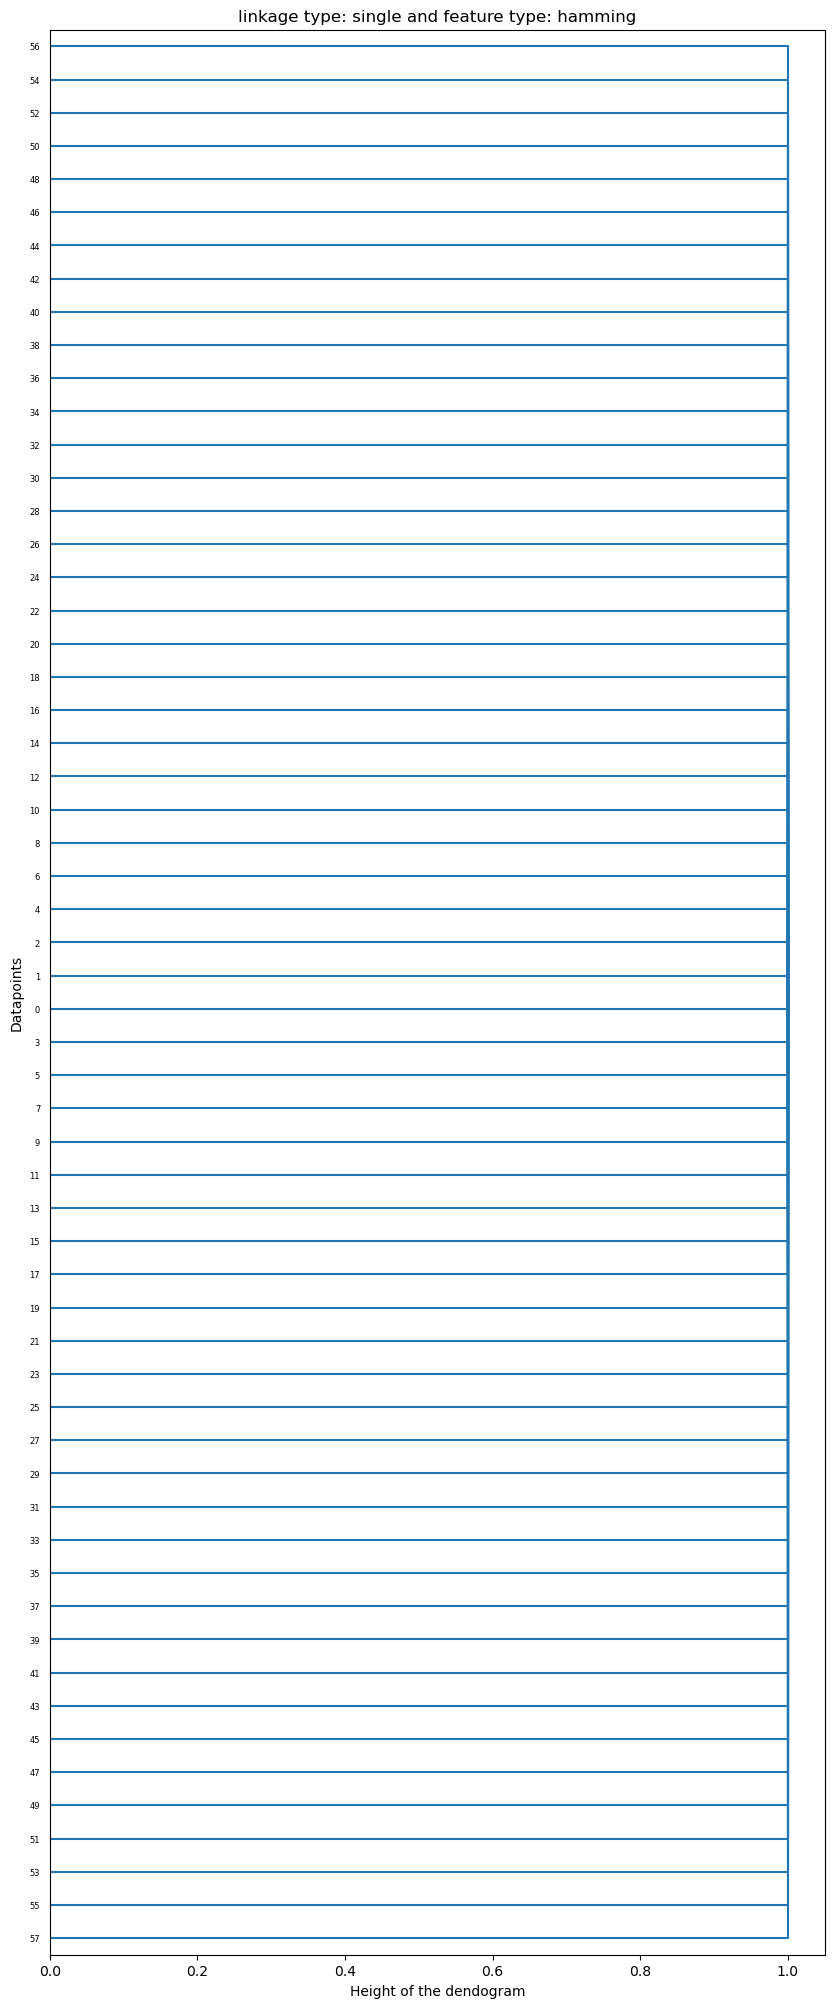

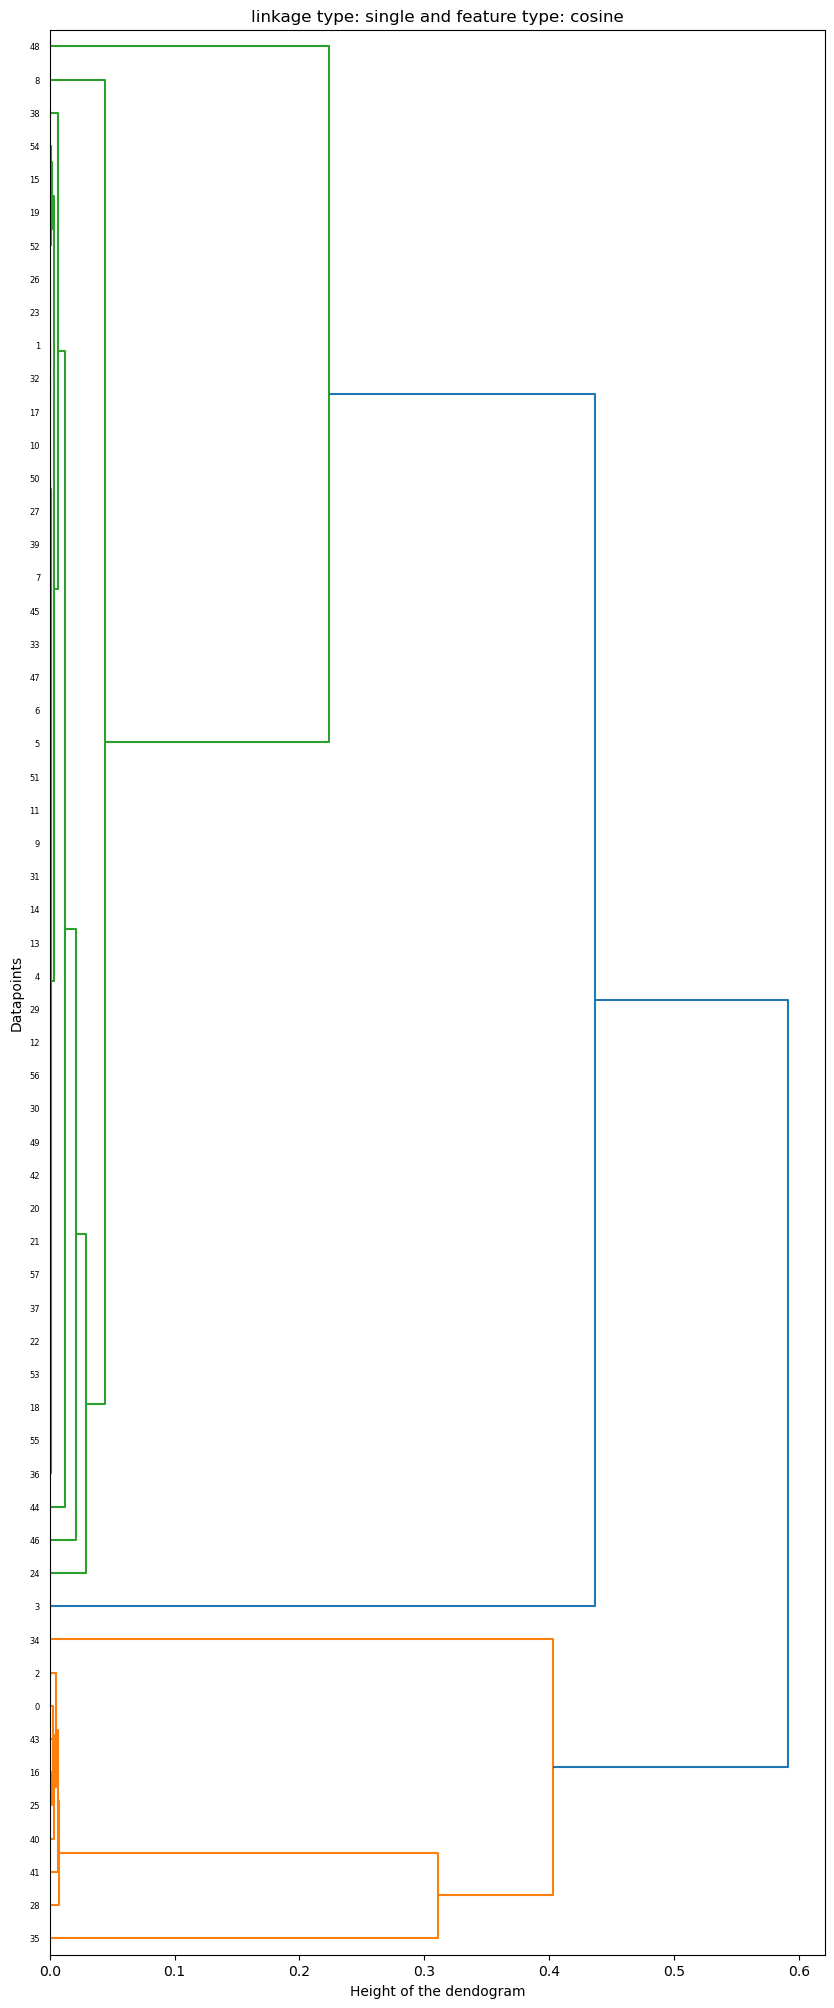

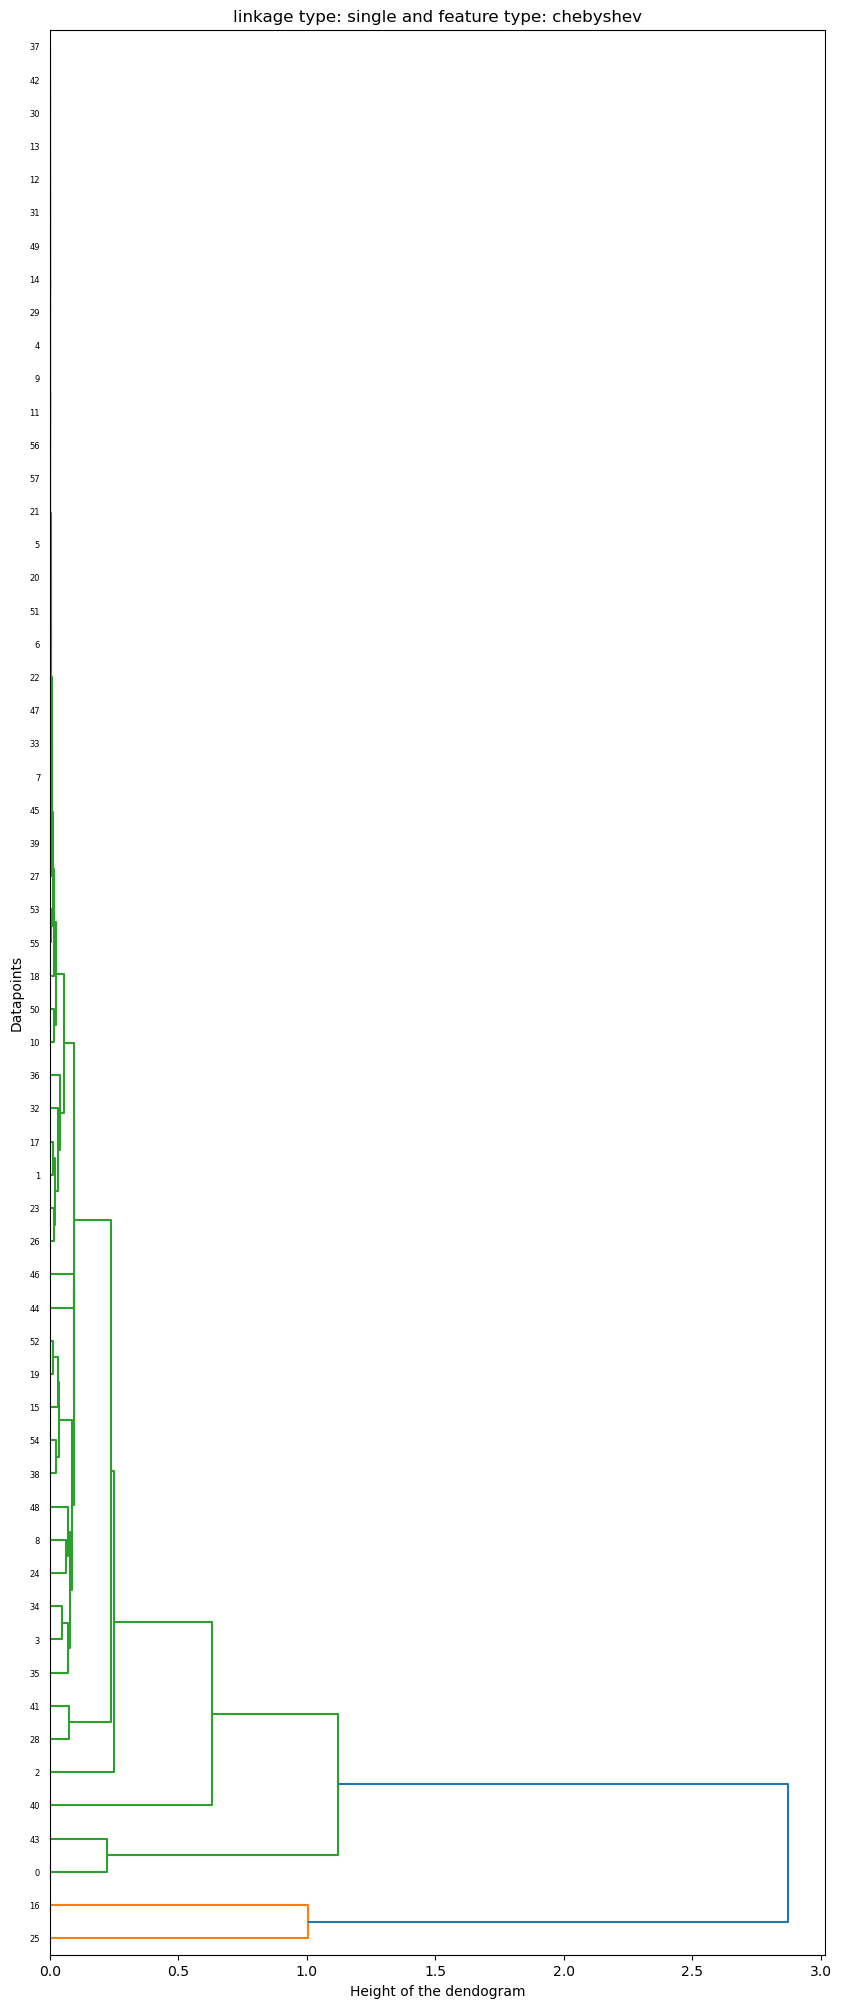

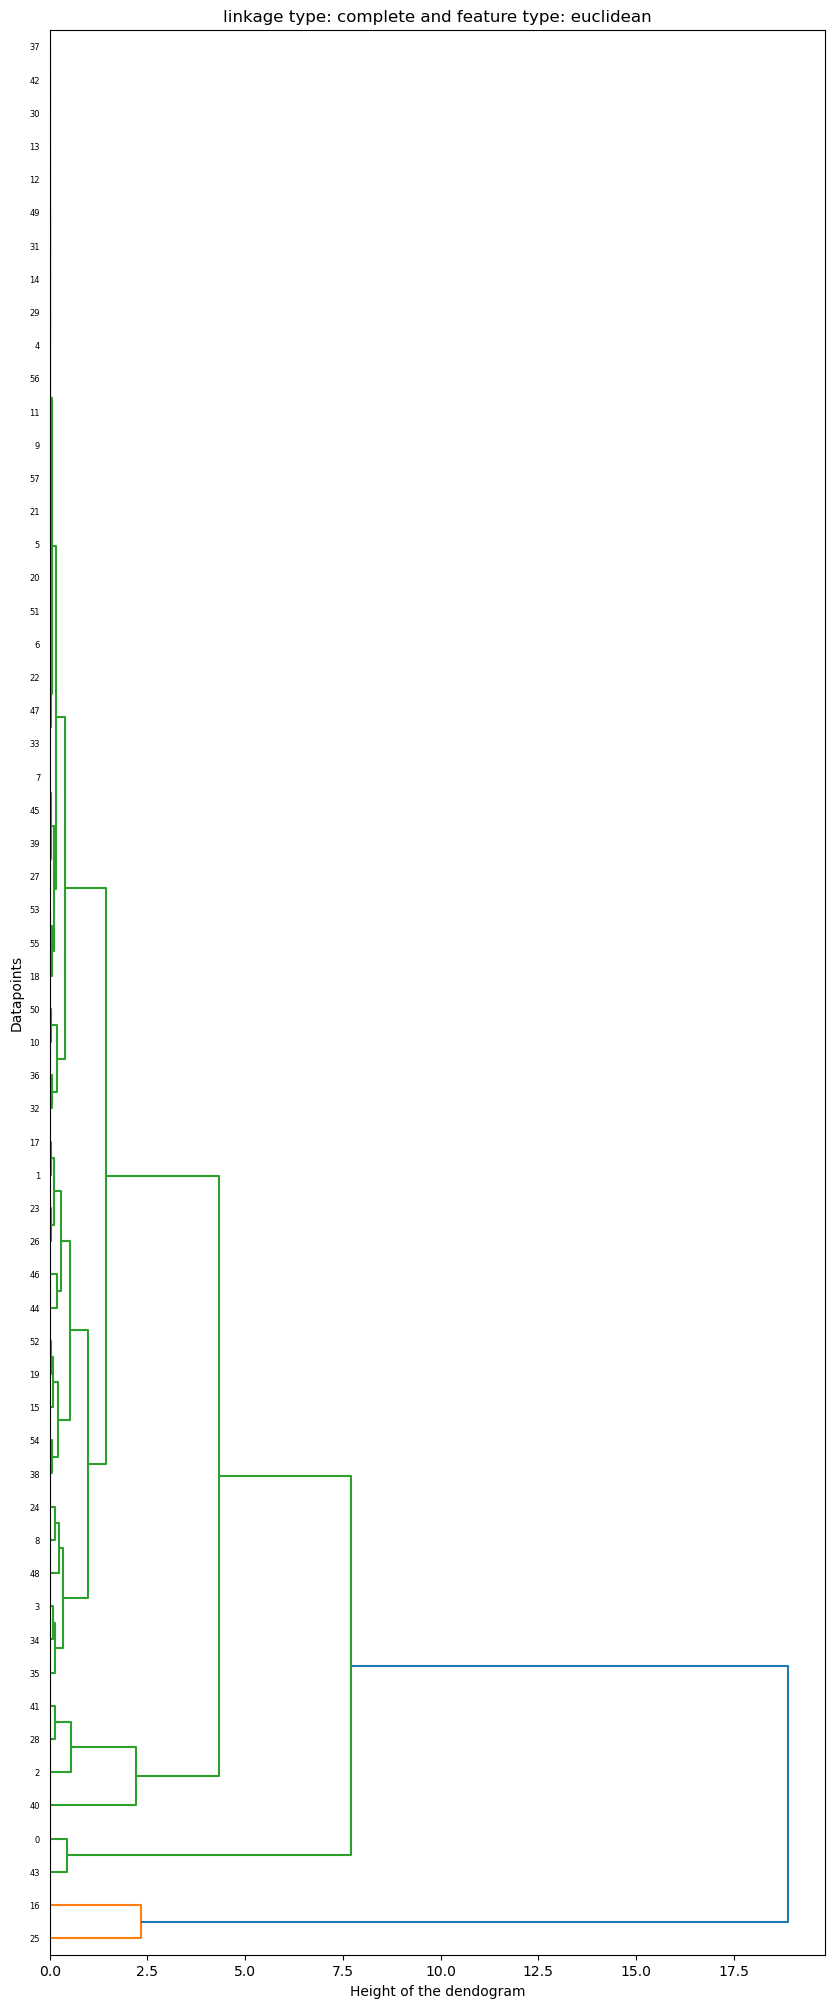

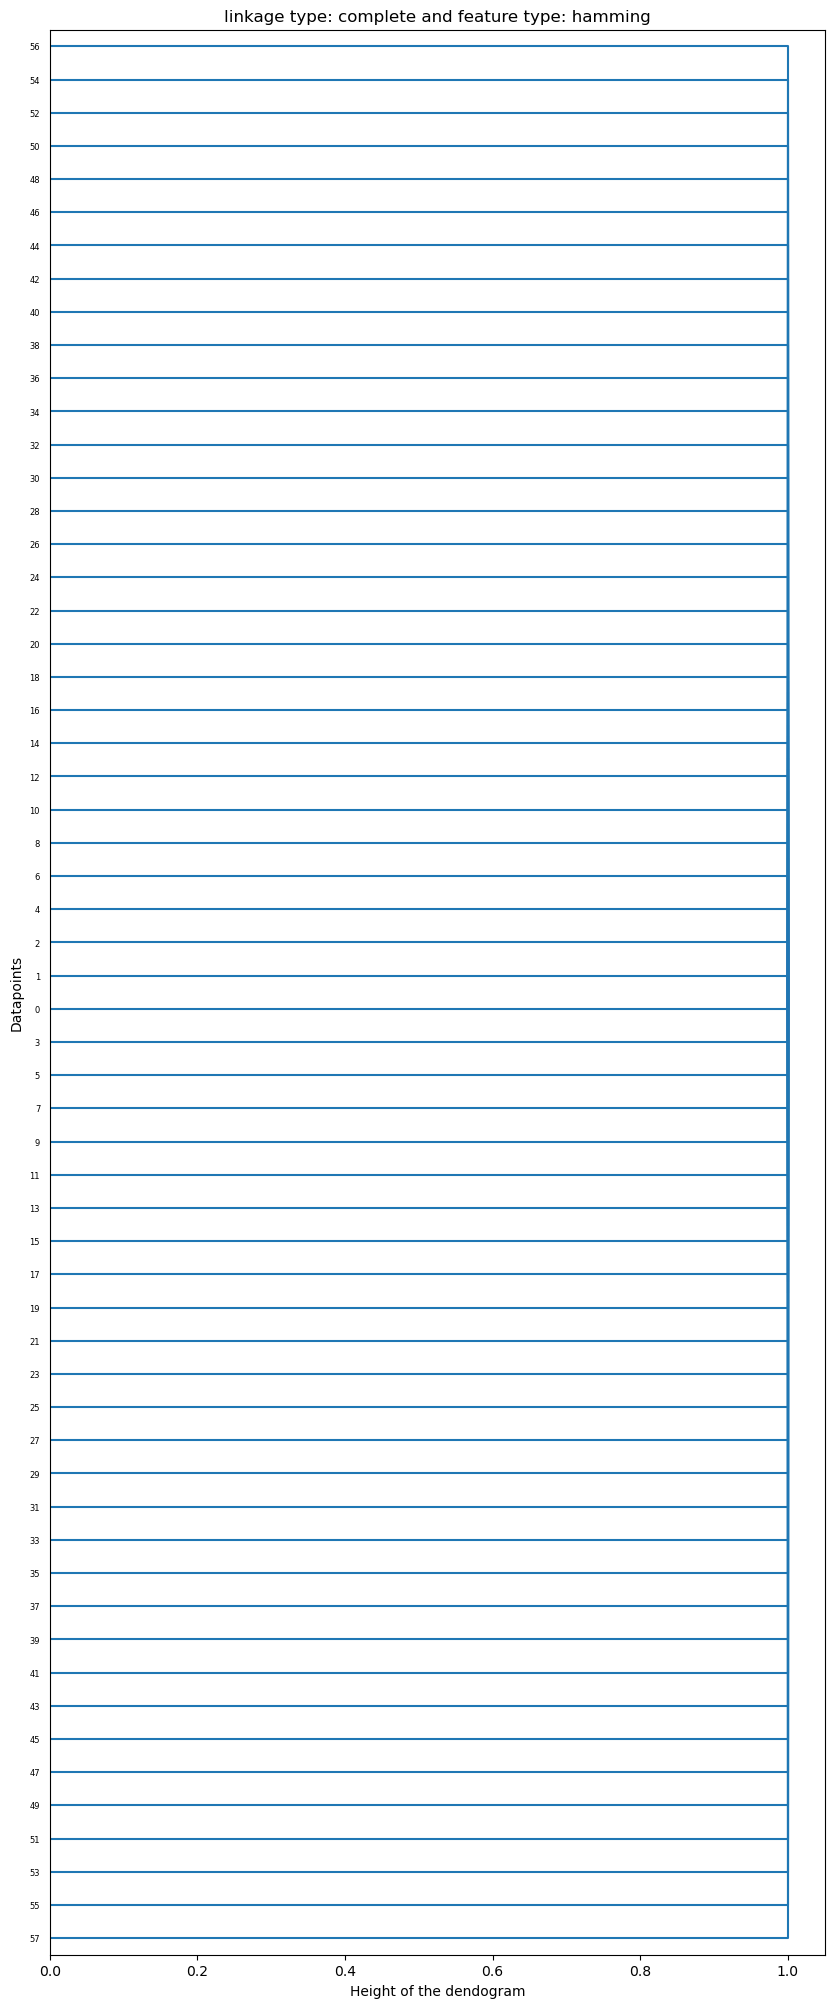

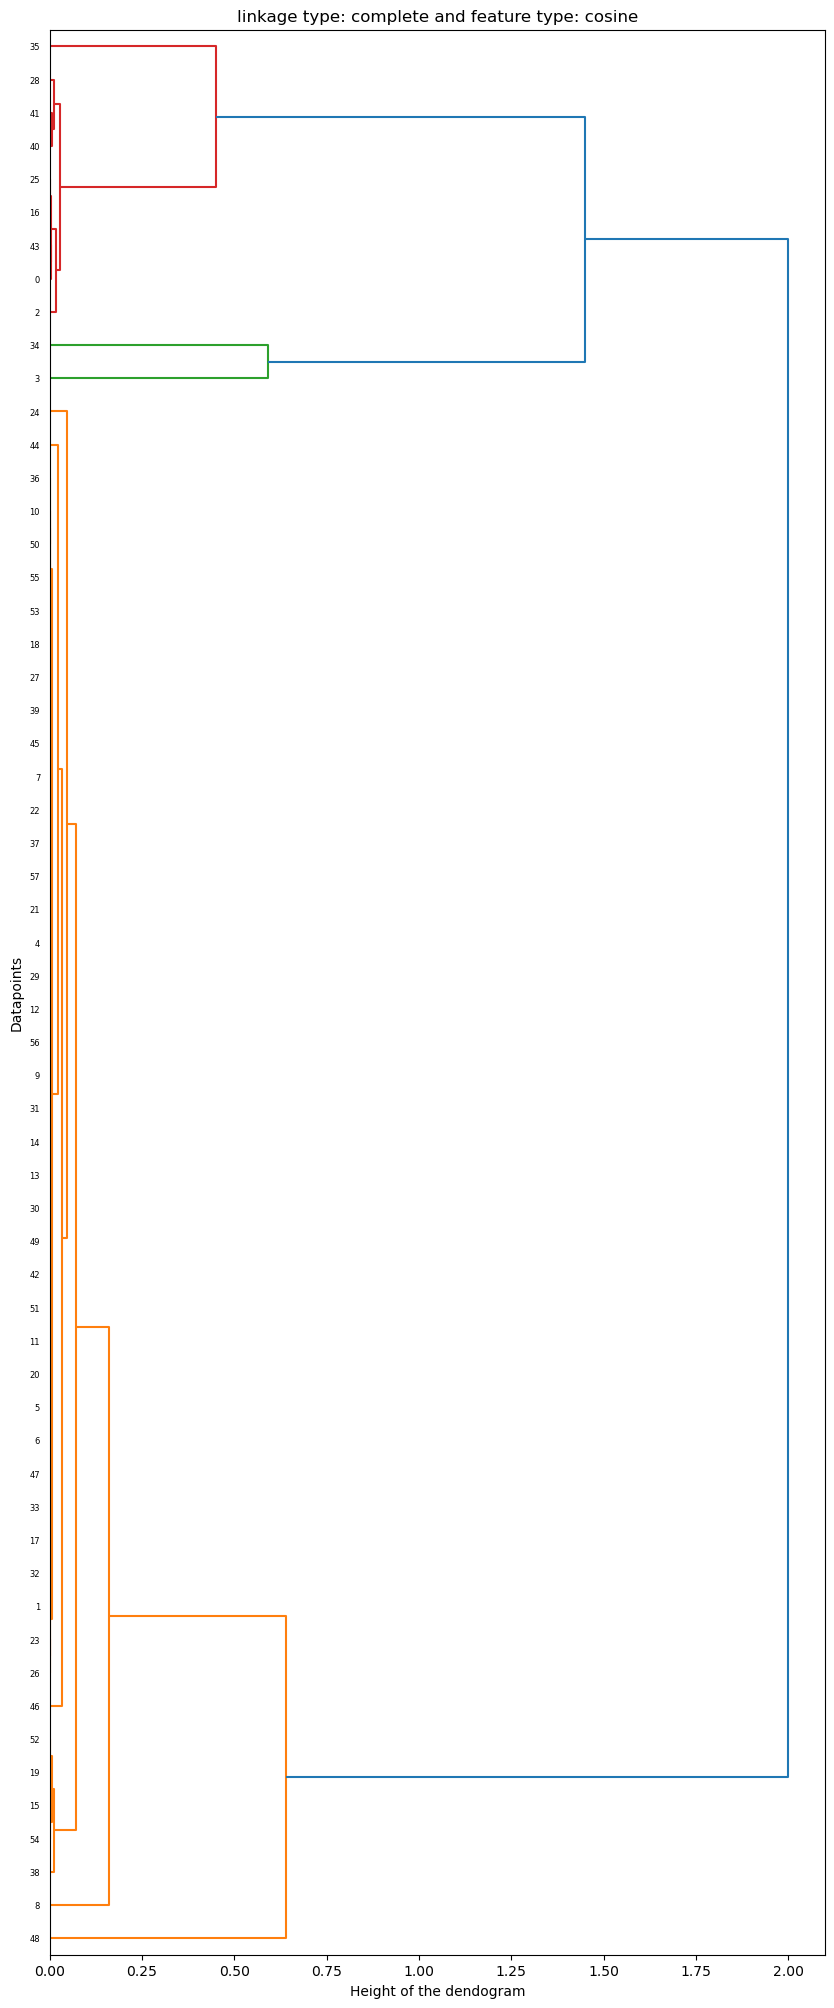

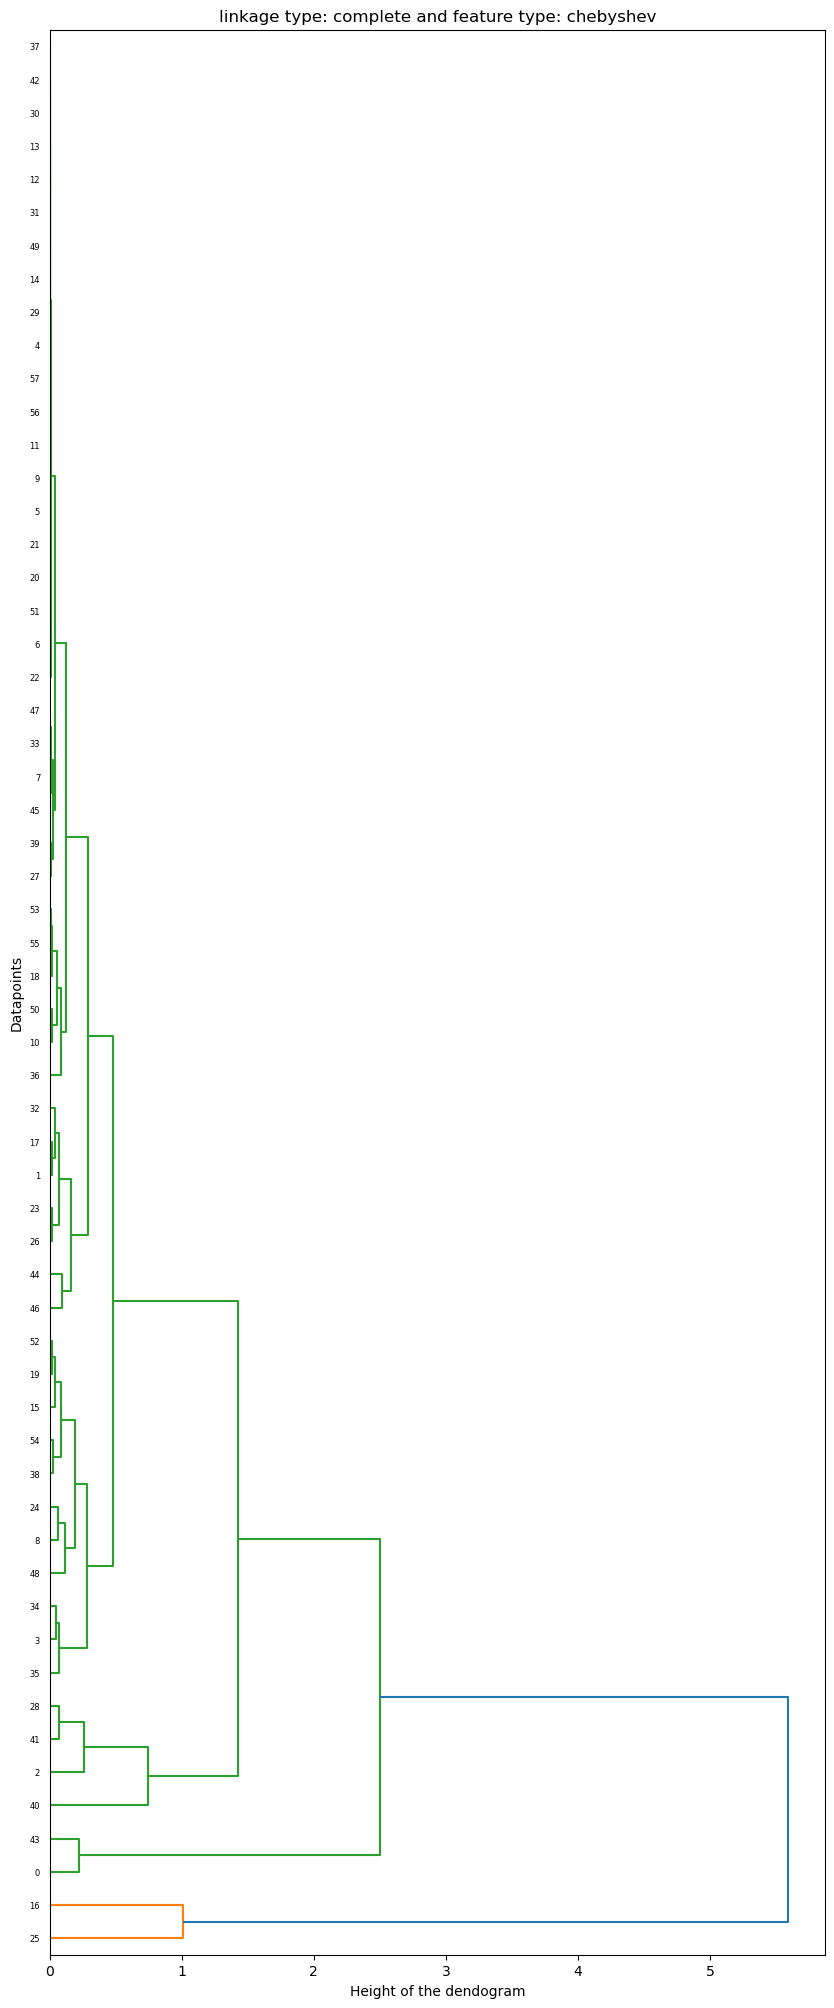

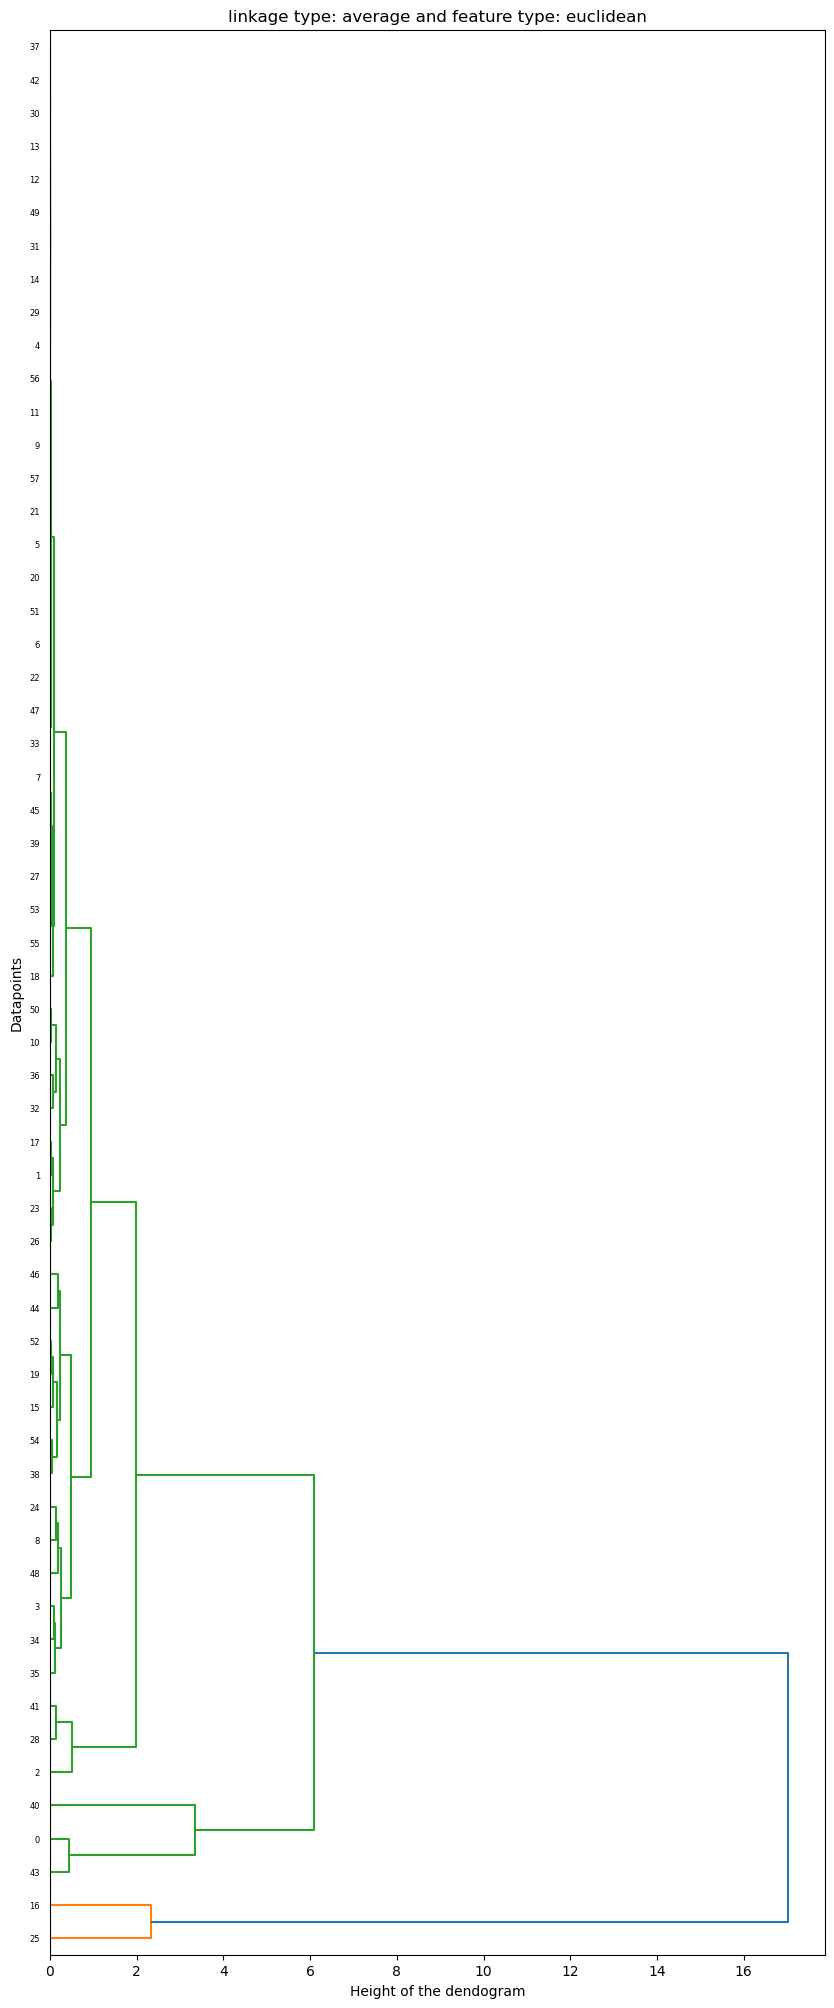

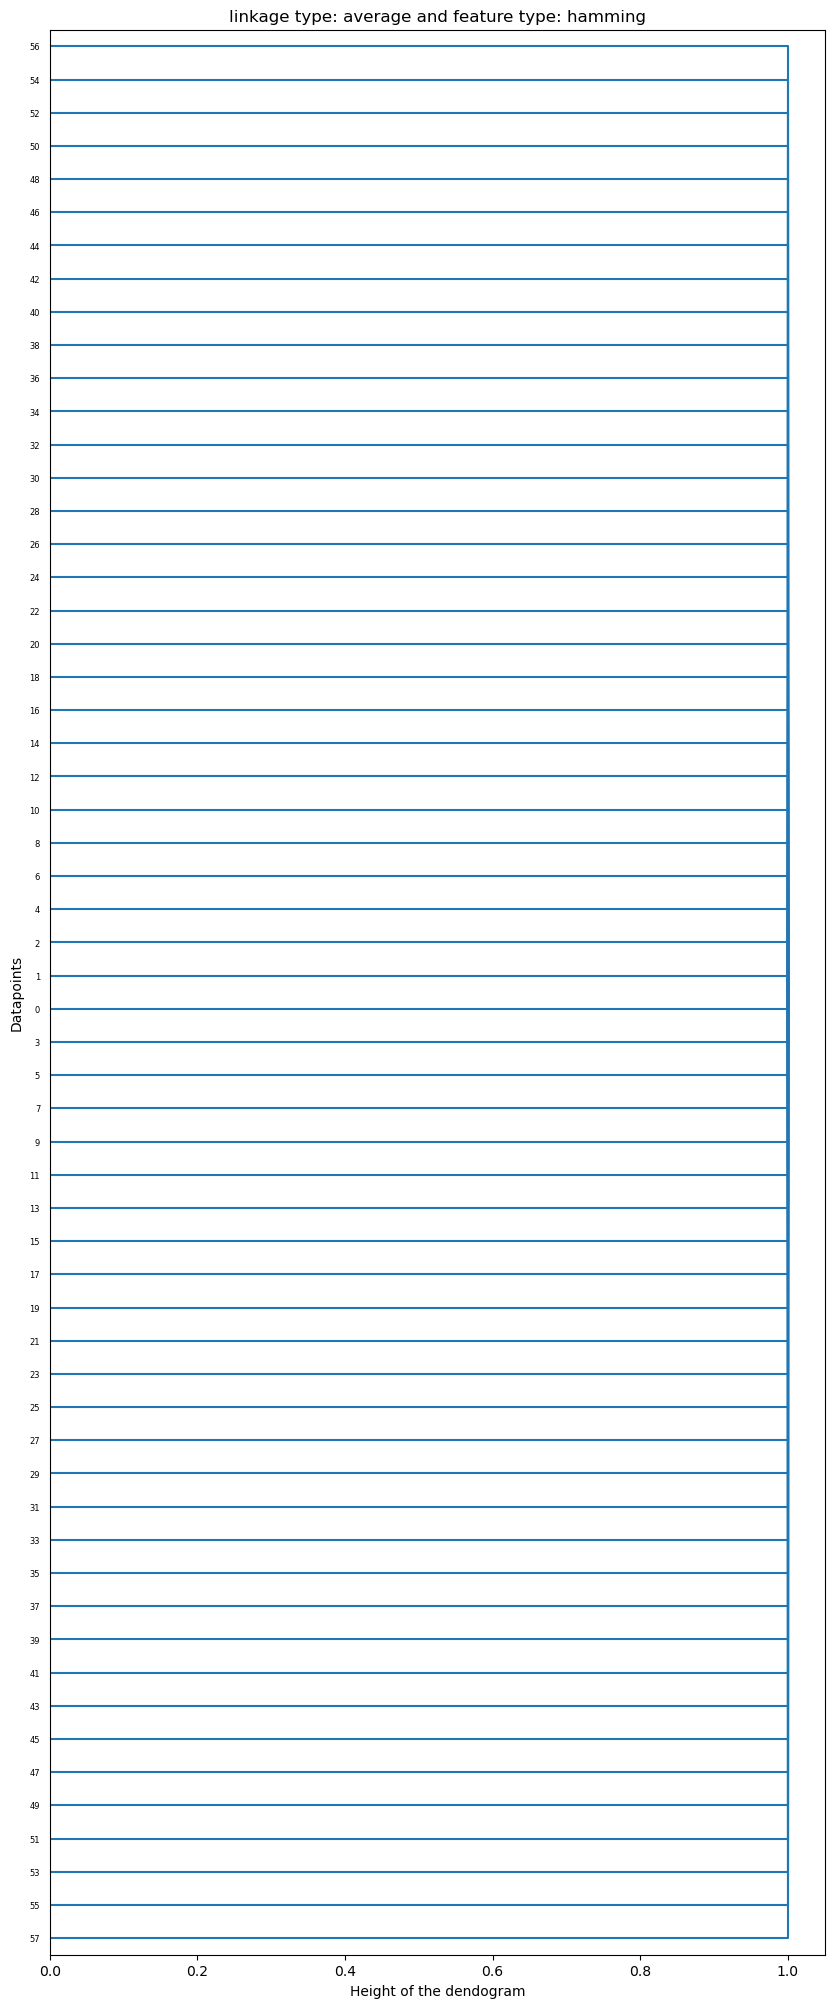

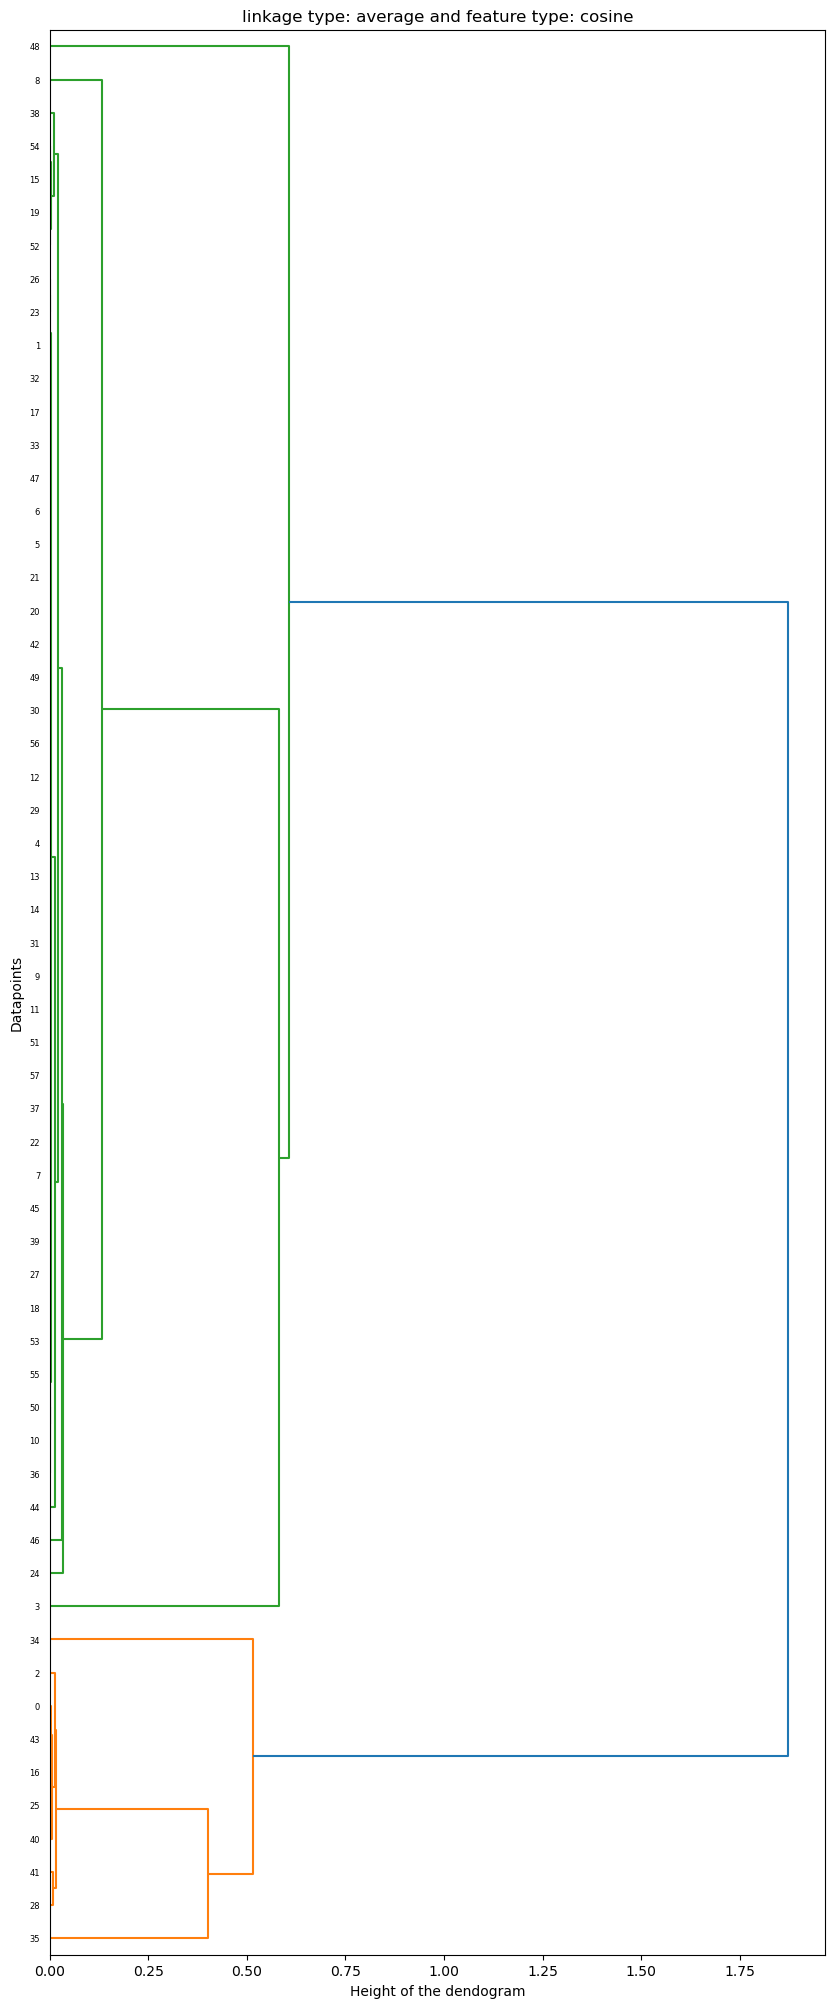

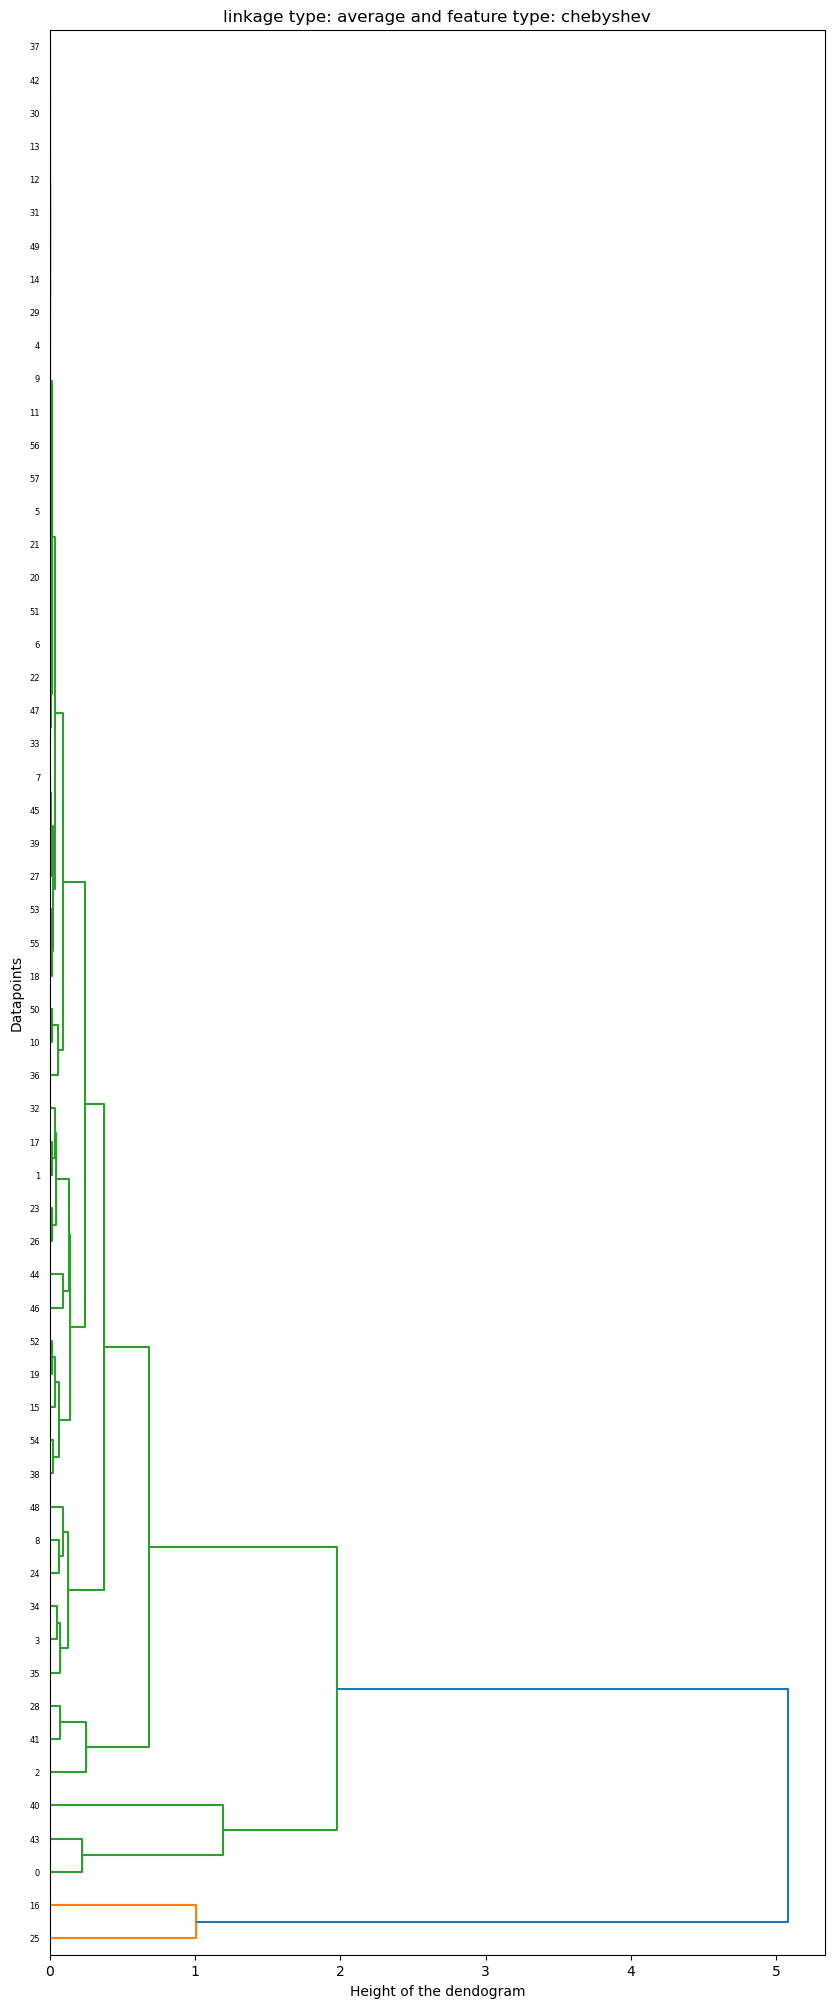

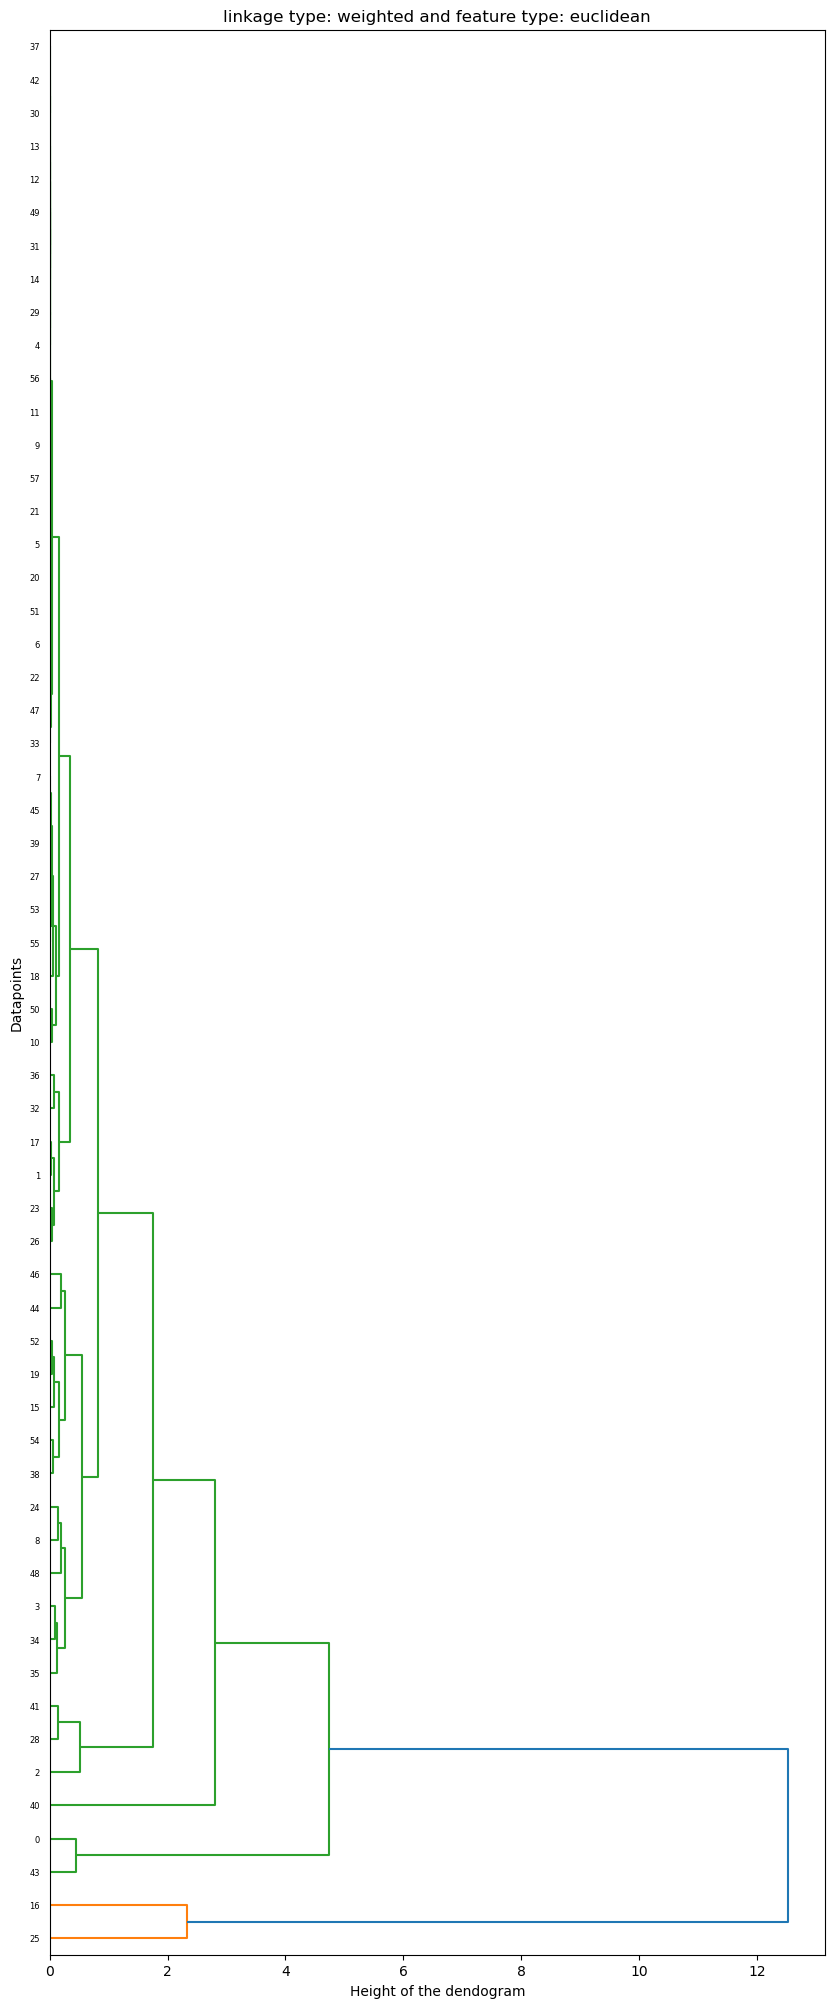

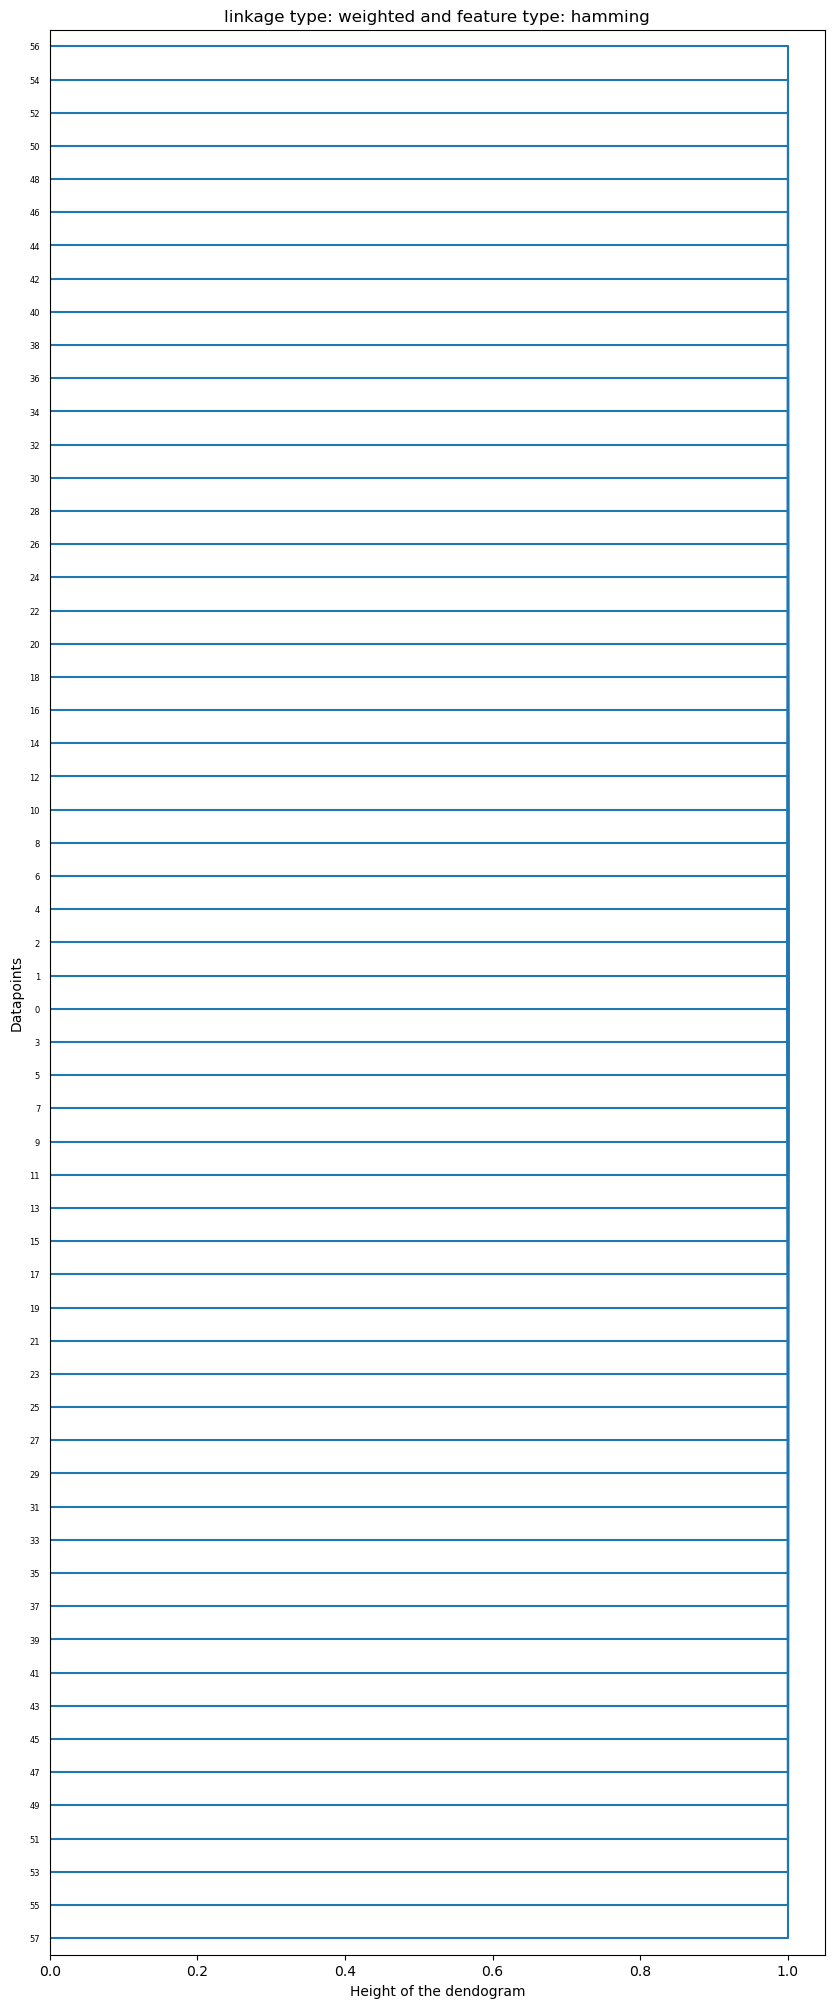

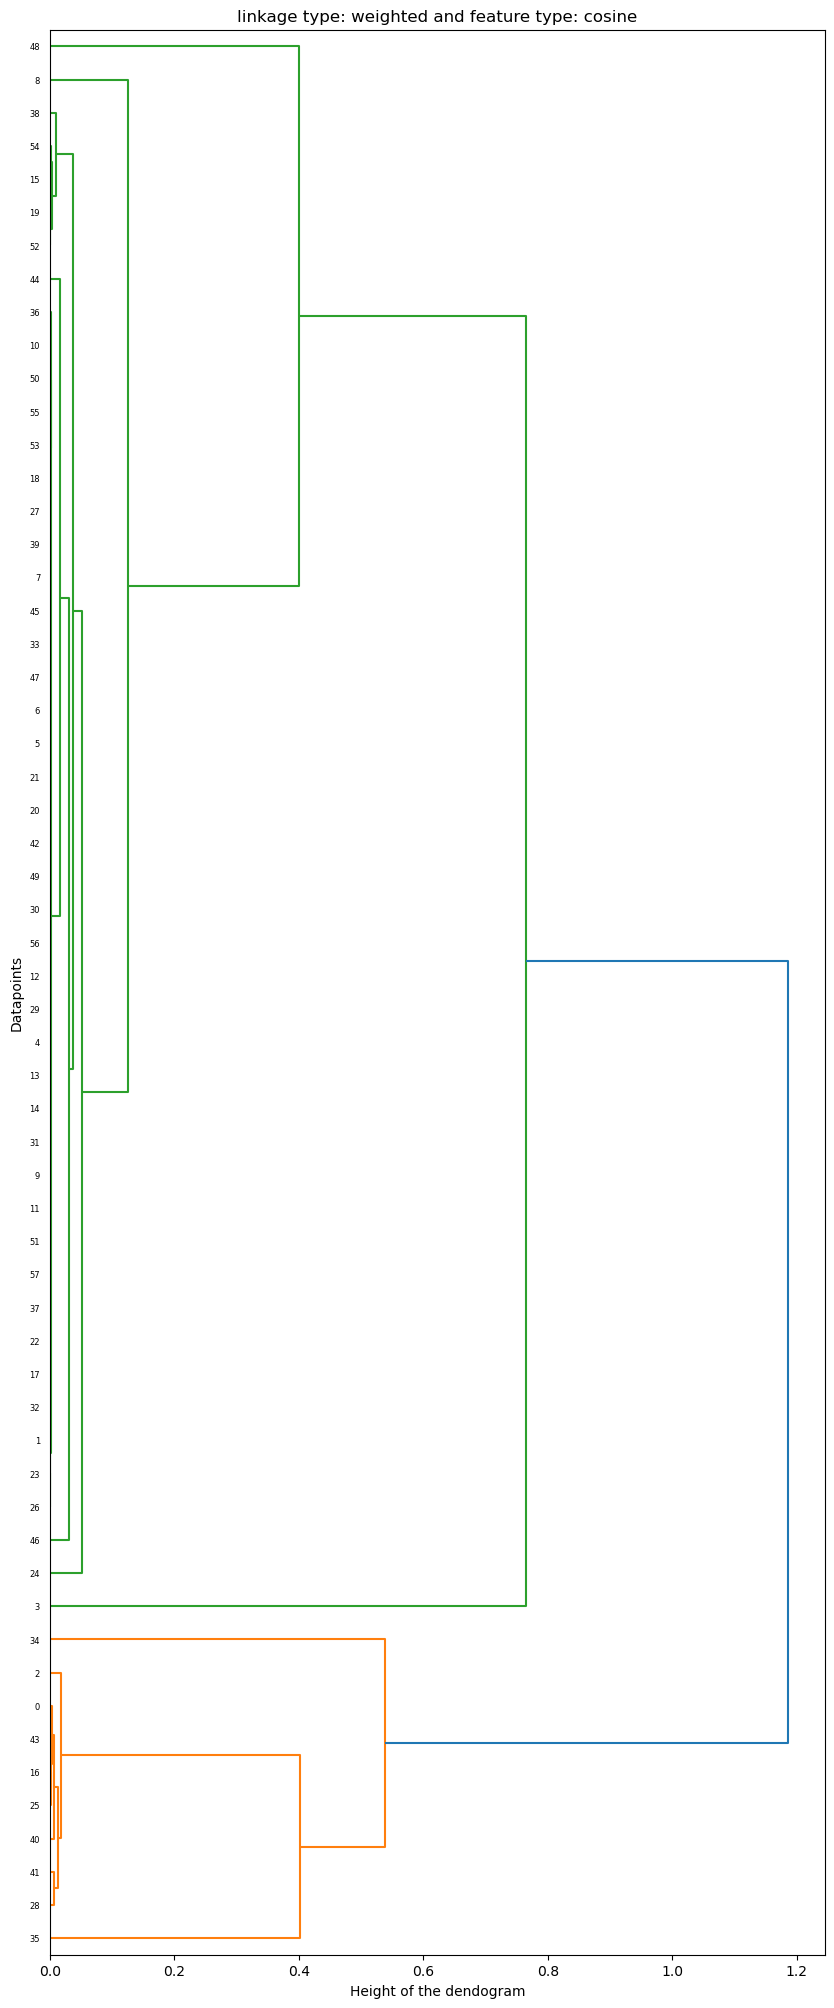

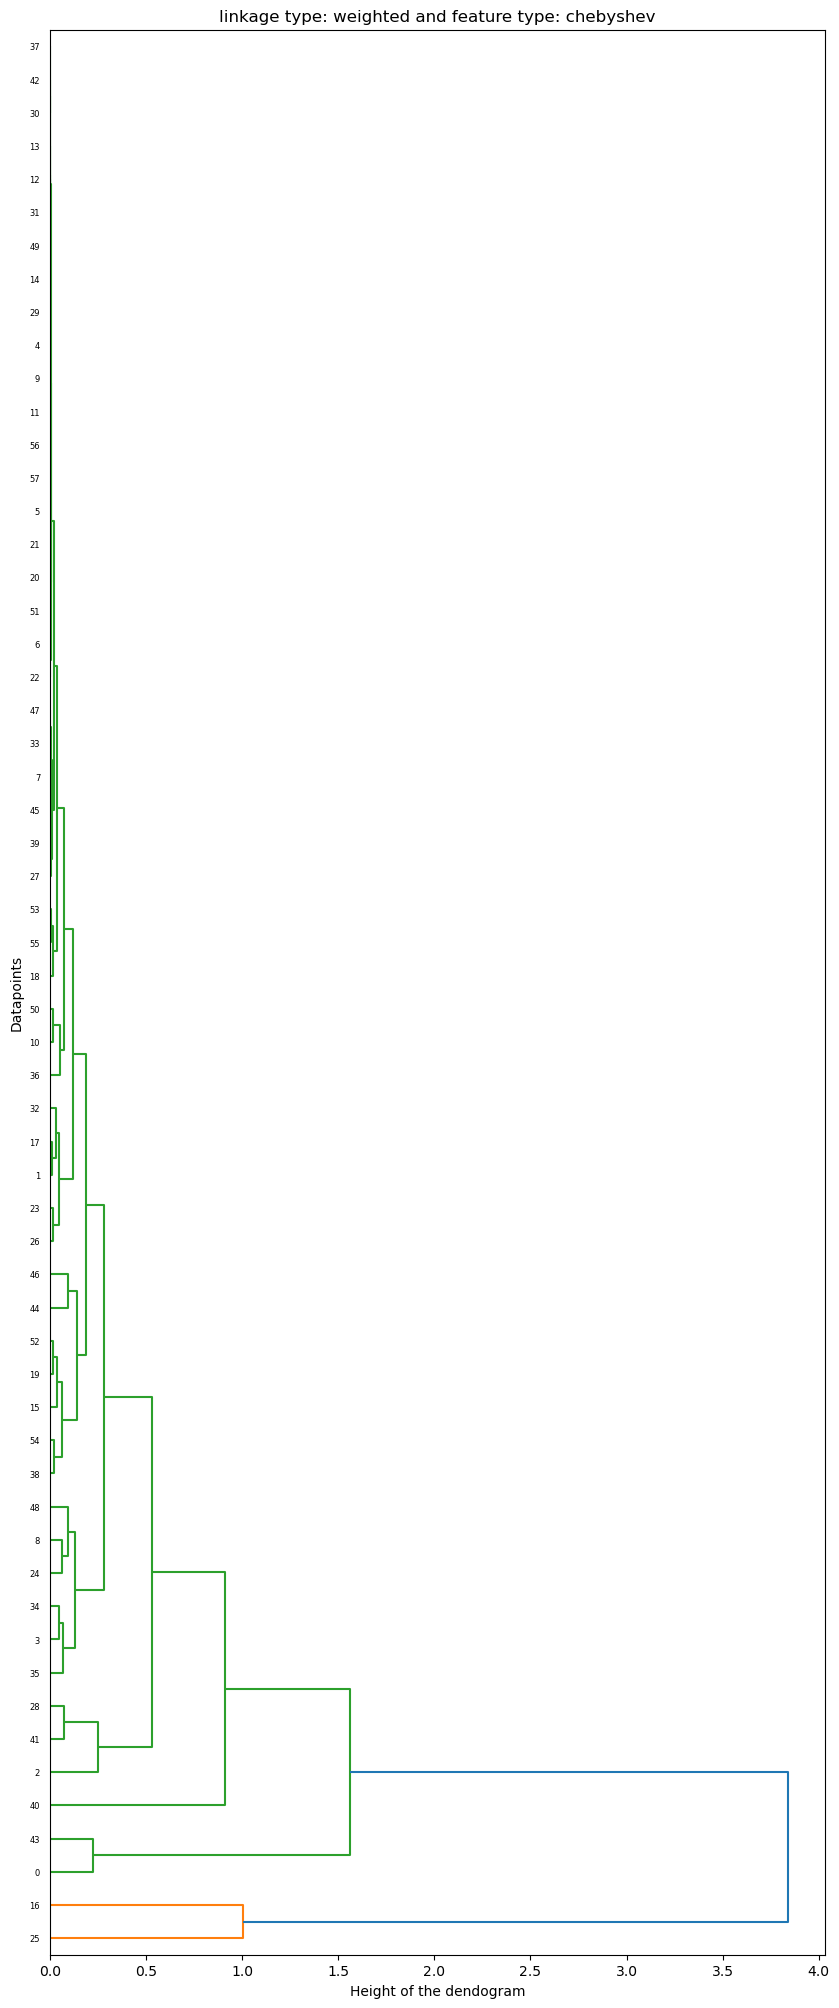

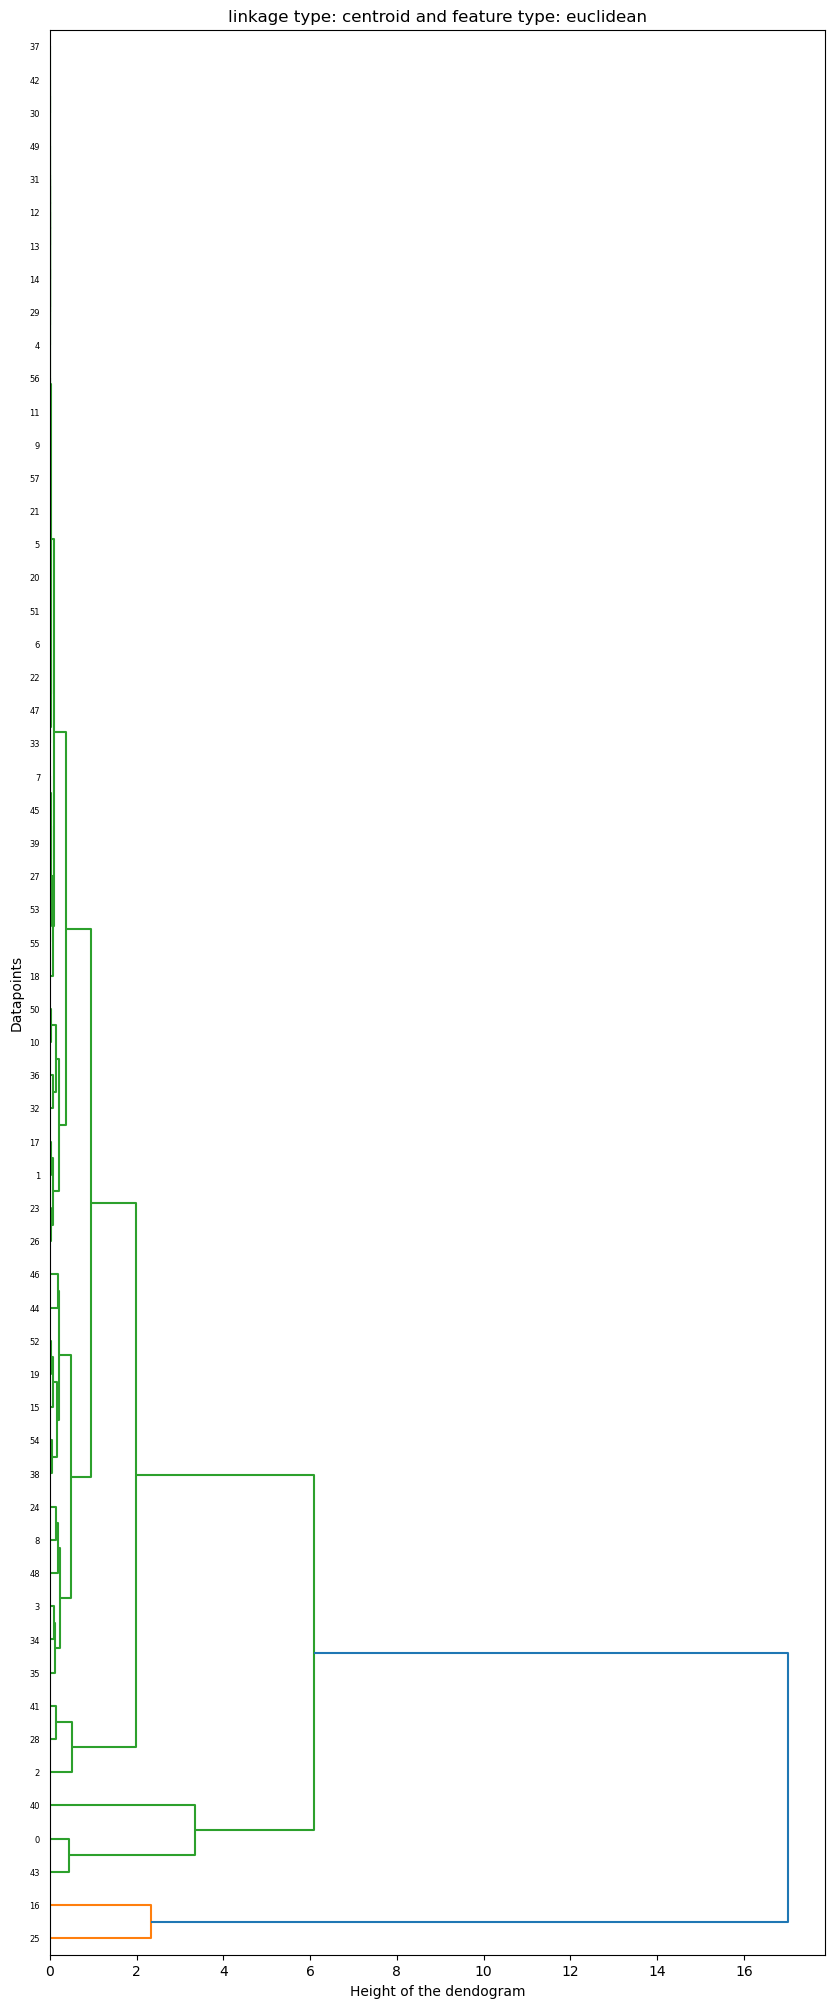

In [25]:
linkage_type = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'] #all possible linkage types given in the linkage documentation of scipy
feature_components = ['euclidean', 'hamming', 'cosine', 'chebyshev']

for link in linkage_type:
    for feature in feature_components:
        if link == 'ward' or link == 'median' or link == 'centroid' and feature != 'euclidean':
            continue
            
        hc = Hierarchial_cluster()

        linkage_matrix = hc.linkage(gene,link, feature)
        plt.figure(figsize=(10, 25))
        dn = hc.dendogram(linkage_matrix)
        plt.xlabel('Height of the dendogram')
        plt.ylabel('Datapoints')
        plt.title(f'linkage type: {link} and feature type: {feature}')

        plt.show()


We can make the following observations for the gene dataset:
  - We can make similar observations to that as the previous dataset.
  - From the plots for hamming loss, we can see that every datapoint is distinct with no similarities because every point becomes a cluster of its own.
  - Since there are clusters being formed from other distance metrics, we can see that there still exists some correlation between the data in higher dimensional spaces.